In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

from sklearn.cluster import KMeans
#from sklearn.cluster import AgglomerativeClustering

import scipy.stats as scy

from statsmodels.api import OLS # Pour la régression linéaire (avec statsmodels)
from statsmodels.tools.tools import add_constant # Pour l'ajout d'une constante dans statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression # Pour la régression linéaire (avec sklearn)
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error # Pour les critères d'erreur
import statsmodels.api as sm
import itertools
#from sklearn.preprocessing import PolynomialFeatures

import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

### *Aquisição de dados*

In [2]:
red_wine = pd.read_csv('winequality-red.csv', delimiter=';', decimal='.')
white_wine = pd.read_csv('winequality-white.csv', delimiter=';', decimal='.')

# Renomear a coluna 'quality' para 'nota'
red_wine.rename(columns={'quality': 'nota'}, inplace=True)
white_wine.rename(columns={'quality': 'nota'}, inplace=True)

# agrupar e ranquiar qualidades
red_wine['quality'] = red_wine['nota'].apply(
    lambda x: 1 if x <= 5 else (2 if x == 6 else 3)
)

red_wine.drop(columns=['nota'], inplace=True)
red_wine['type wine'] = "red"

white_wine['quality'] = white_wine['nota'].apply(
    lambda x: 1 if x <= 5 else (2 if x == 6 else 3)
)

white_wine.drop(columns=['nota'], inplace=True)
white_wine['type wine'] = "white"

red_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type wine  
0      9.4        1       red  
1      9.8        1       red  
2      9.8        1       red  
3      9.8        2       red  
4      9.4        1       red

In [3]:
white_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality type wine  
0      8.8        2     white  
1      9.5        2     white  
2     10.1        2     white  
3      9.9        2     white  
4      9.9        2     white

In [4]:
all_wines = pd.concat([red_wine, white_wine], ignore_index=True)
all_wines.head()
#all_wines.value_counts(['type wine'])

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type wine  
0      9.4        1       red  
1      9.8        1       red  
2      9.8        1       red  
3      9.8        2       red  
4      9.4        1       red

### Histogramas

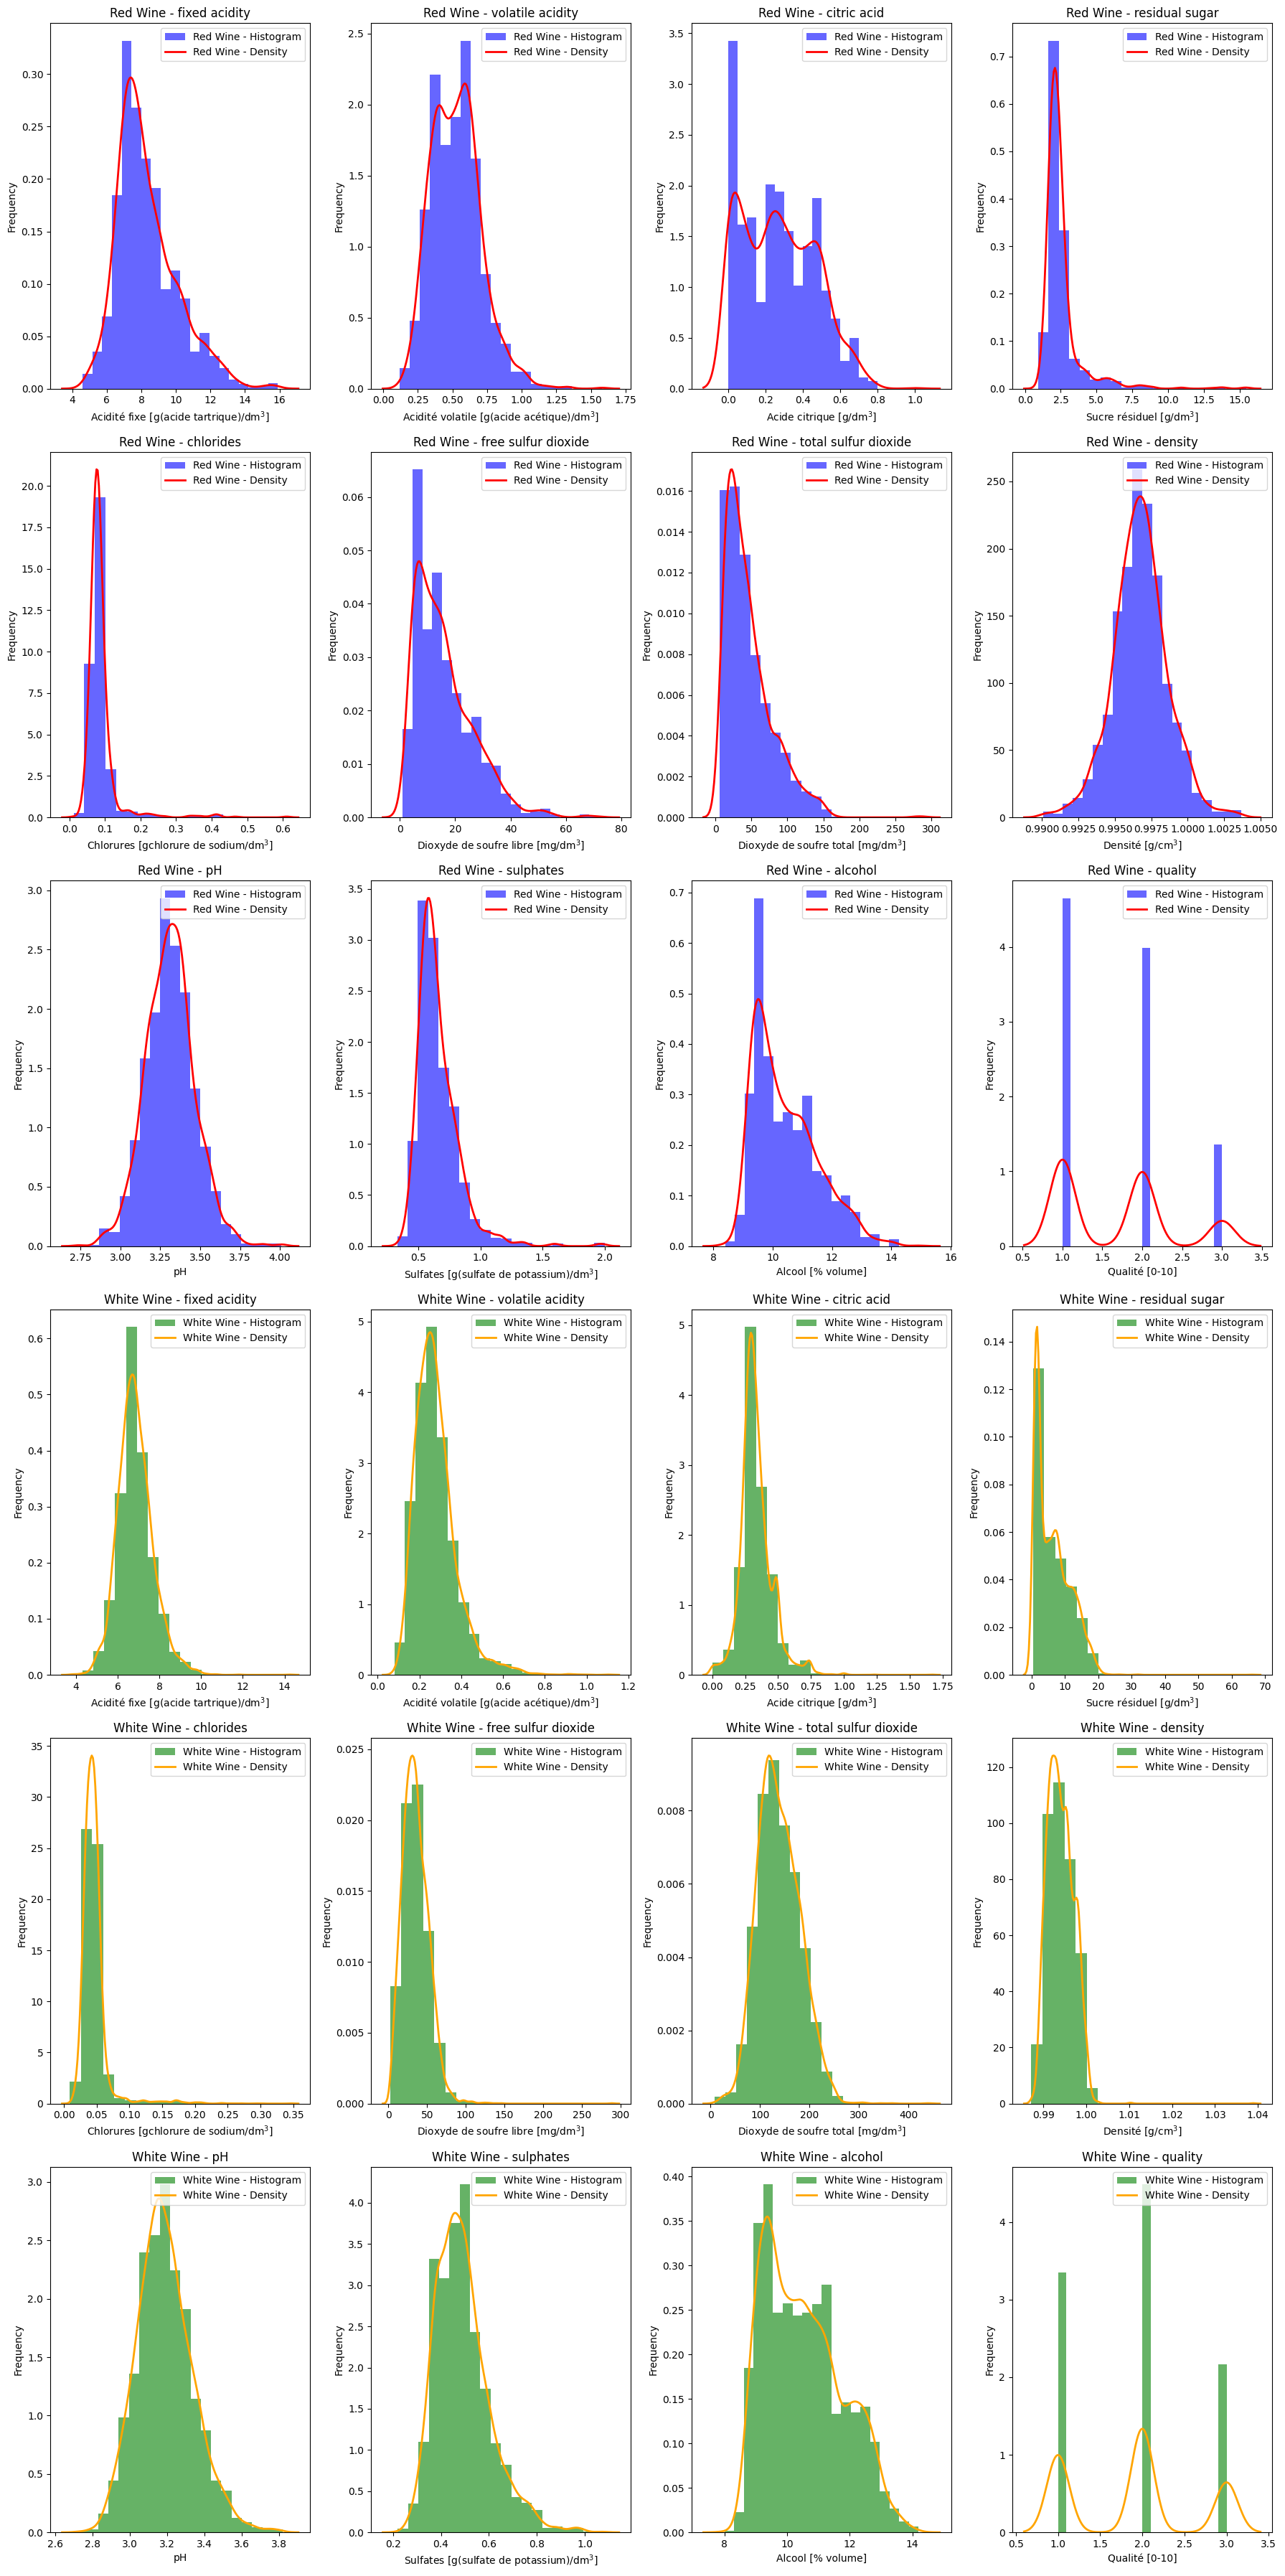

In [5]:
columns = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'
]

new_names = [
    'Acidité fixe [g(acide tartrique)/dm$^3$]',
    'Acidité volatile [g(acide acétique)/dm$^3$]',
    'Acide citrique [g/dm$^3$]',
    'Sucre résiduel [g/dm$^3$]',
    'Chlorures [gchlorure de sodium/dm$^3$]',
    'Dioxyde de soufre libre [mg/dm$^3$]',
    'Dioxyde de soufre total [mg/dm$^3$]',
    'Densité [g/cm$^3$]',
    'pH', 'Sulfates [g(sulfate de potassium)/dm$^3$]', 'Alcool [% volume]', 'Qualité [0-10]'
]

# Filtrar os dados por tipo de vinho
red_wine = all_wines[all_wines['type wine'] == 'red']
white_wine = all_wines[all_wines['type wine'] == 'white']

# Configuração de gráficos para "red wine"
plt.figure(figsize=(18, 36))  # Figura maior para acomodar dois blocos de histogramas

for i, (col, name) in enumerate(zip(columns, new_names), 1):
    # Plotar histograma de "red wine"
    plt.subplot(6, 4, i)
    plt.hist(red_wine[col], color='blue', bins=20, alpha=0.6, density=True, label='Red Wine - Histogram')
    sns.kdeplot(red_wine[col], color='red', linewidth=2, label='Red Wine - Density')
    plt.title(f'Red Wine - {col}')
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.legend()

# Configuração de gráficos para "white wine"
for i, (col, name) in enumerate(zip(columns, new_names), 1):
    # Plotar histograma de "white wine"
    plt.subplot(6, 4, len(columns) + i)
    plt.hist(white_wine[col], color='green', bins=20, alpha=0.6, density=True, label='White Wine - Histogram')
    sns.kdeplot(white_wine[col], color='orange', linewidth=2, label='White Wine - Density')
    plt.title(f'White Wine - {col}')
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.legend()

# Ajustar layout e exibir
plt.tight_layout()
plt.show()


Résumes numeriques

In [6]:
# red wine
numerical_summaries = red_wine.describe()
numerical_summaries.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     1.670419  
std       0.154386     0.169507     1.065668     0.701915  
min       2.740000     0.330000     8.400000     1.000000  
25%       3.210000     0.550000     9.500000     1.000000  
50%       3.310000     0.620000    10.200000     2.000000  
75%       3.400000     0.730000    11.100000     2.000000  
max       4.010000     2.000000    14.900000     3.000000

In [7]:
#white_wine
numerical_summaries = white_wine.describe()
numerical_summaries.head(10)


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     1.881584  
std       0.151001     0.114126     1.230621     0.733030  
min       2.720000     0.220000     8.000000     1.000000  
25%       3.090000     0.410000     9.500000     1.000000  
50%       3.180000     0.470000    10.400000     2.000000  
75%       3.280000     0.550000    11.400000     2.000000  
max       3.820000     1.080000    14.200000     3.000000

In [8]:
# all  wines
numerical_summaries = all_wines.describe()
numerical_summaries.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     1.829614  
std       0.160787     0.148806     1.192712     0.731124  
min       2.720000     0.220000     8.000000     1.000000  
25%       3.110000     0.430000     9.500000     1.000000  
50%       3.210000     0.510000    10.300000     2.000000  
75%       3.320000     0.600000    11.300000     2.000000  
max       4.010000     2.000000    14.900000     3.000000

### Boxplot

tous les vins

C:\Users\USER-64\AppData\Local\Temp\ipykernel_17516\3209204349.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_wines_renamed, x='quality', y=col, palette=soft_palette)
C:\Users\USER-64\AppData\Local\Temp\ipykernel_17516\3209204349.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_wines_renamed, x='quality', y=col, palette=soft_palette)
C:\Users\USER-64\AppData\Local\Temp\ipykernel_17516\3209204349.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_wines_renamed, x='quality', y=col, palette=soft_palette)
C

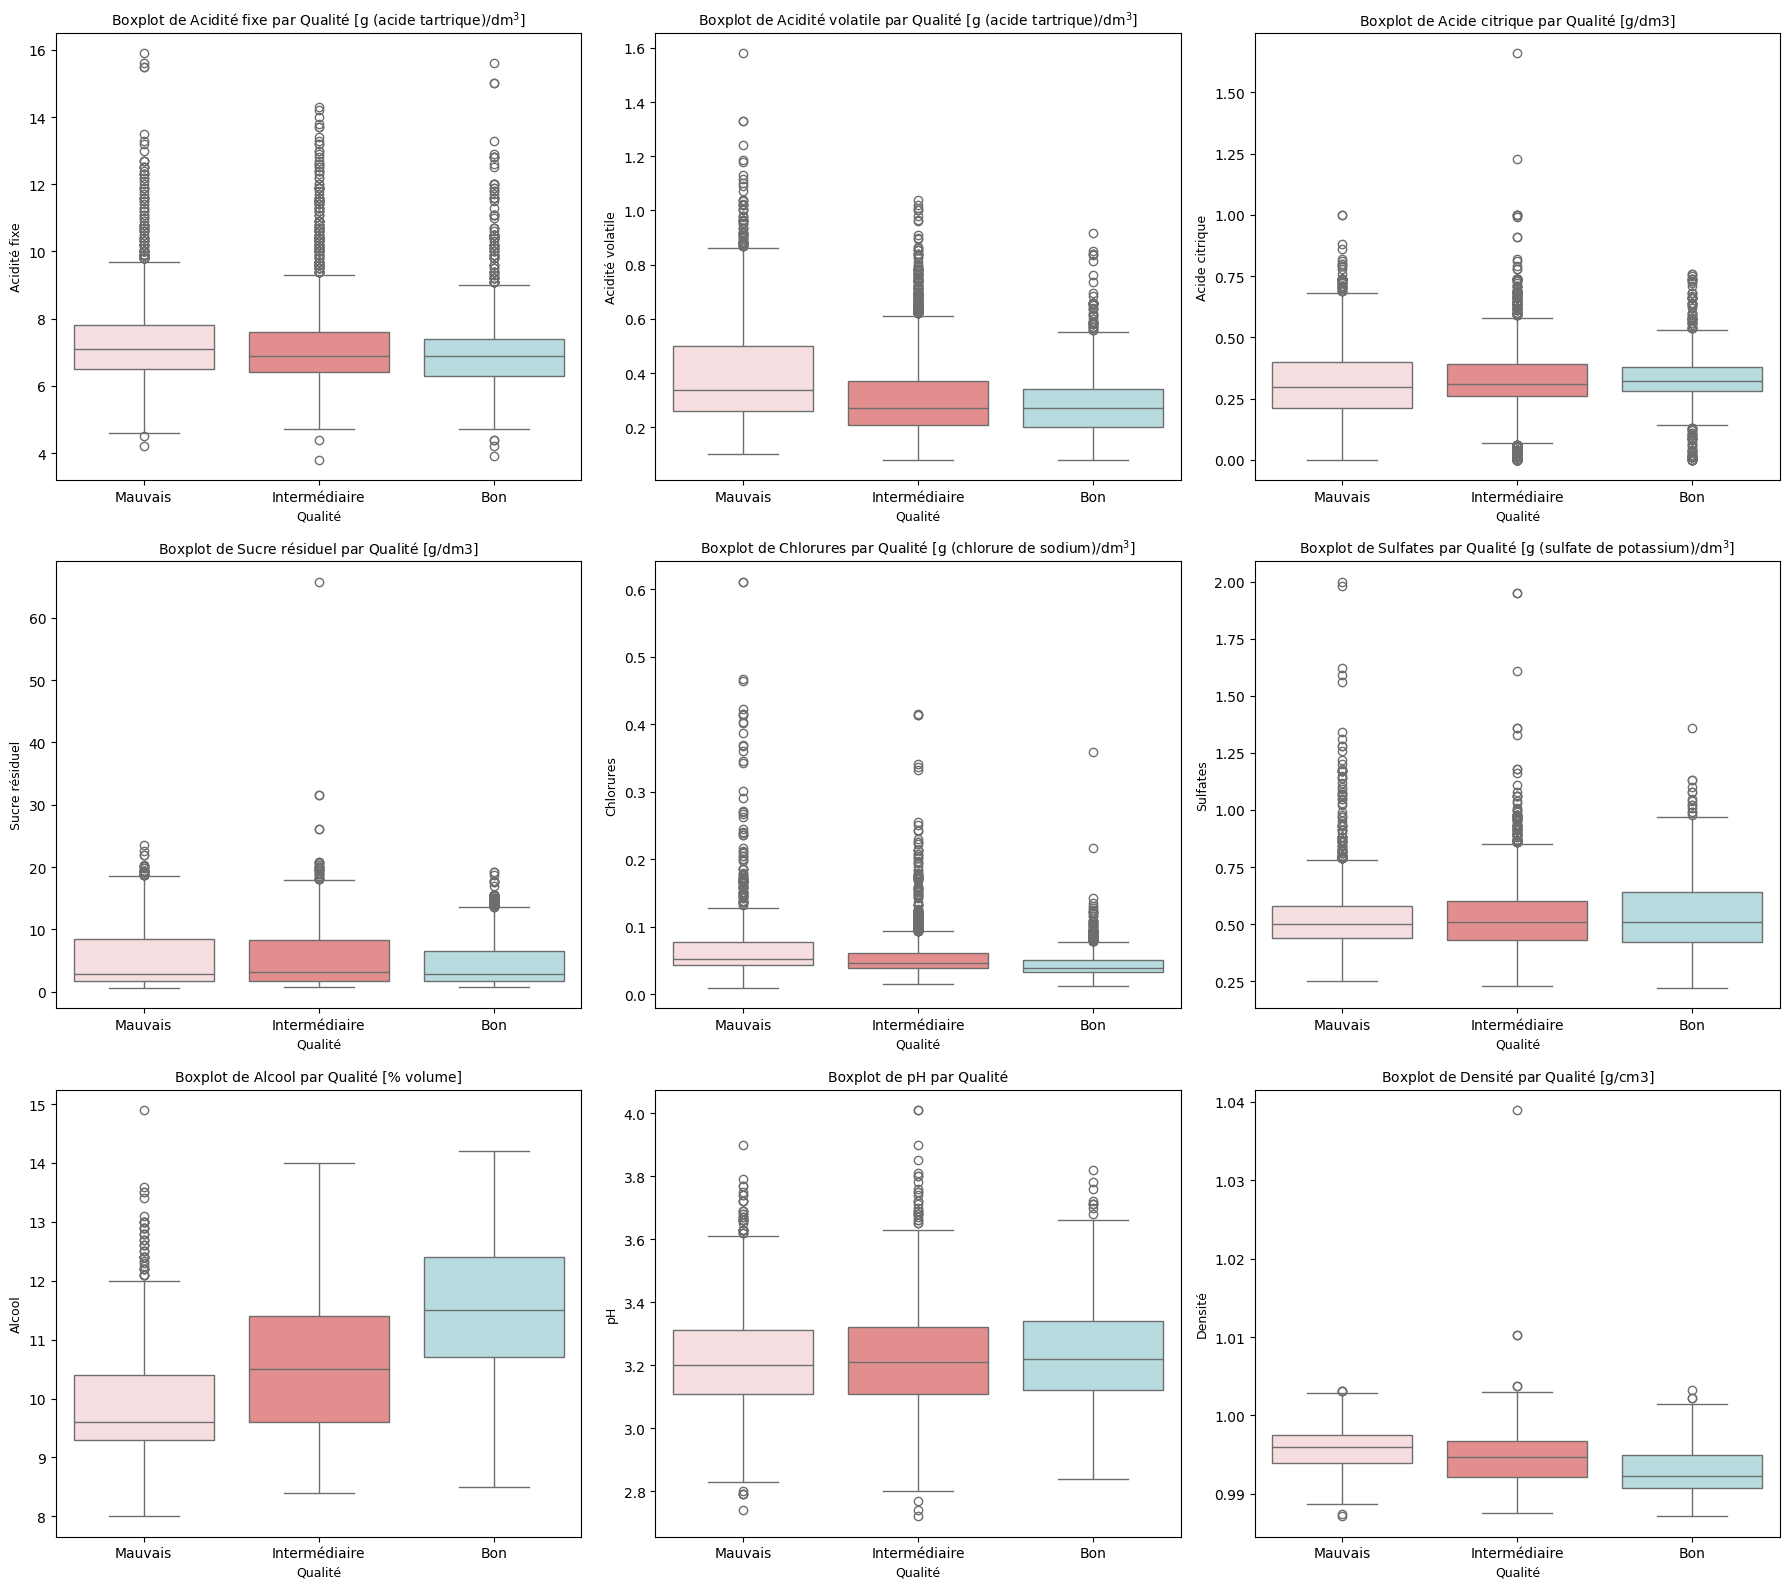

In [9]:
# Dicionário para renomear colunas
rename_columns = {
    'fixed acidity': 'Acidité fixe',
    'volatile acidity': 'Acidité volatile',
    'citric acid': 'Acide citrique',
    'residual sugar': 'Sucre résiduel',
    'chlorides': 'Chlorures',
    'sulphates': 'Sulfates',
    'alcohol': 'Alcool',
    'density': 'Densité'
}

# Renomear as colunas do dataframe
all_wines_renamed = all_wines.rename(columns=rename_columns)

# Criar um dicionário para mapear os valores de qualidade para as categorias desejadas
quality_mapping = {1: 'Mauvais', 2: 'Intermédiaire', 3: 'Bon'}

# Aplicar o mapeamento à coluna 'quality'
all_wines_renamed['quality'] = all_wines_renamed['quality'].map(quality_mapping)


# Paleta de cores suaves (tons pastéis)
soft_palette = ['#FADADD', '#F08080', '#B0E0E6']  # Rosa pastel, vermelho claro suave, azul pastel

# Configurar a figura para exibir boxplots
plt.figure(figsize=(18, 16))

# Variáveis para os boxplots
boxplot_columns = ['Acidité fixe', 'Acidité volatile', 'Acide citrique', 'Sucre résiduel', 'Chlorures', 'Sulfates', 'Alcool', 'pH', 'Densité']
boxplot_titles = {
    'Acidité fixe': 'Boxplot de Acidité fixe par Qualité [g (acide tartrique)/dm$^3$]',
    'Acidité volatile': 'Boxplot de Acidité volatile par Qualité [g (acide tartrique)/dm$^3$]',
    'Acide citrique': 'Boxplot de Acide citrique par Qualité [g/dm$3$]',
    'Sucre résiduel': 'Boxplot de Sucre résiduel par Qualité [g/dm$3$]',
    'Chlorures': 'Boxplot de Chlorures par Qualité [g (chlorure de sodium)/dm$^3$]',
    'Sulfates': 'Boxplot de Sulfates par Qualité [g (sulfate de potassium)/dm$^3$]',
    'Alcool': 'Boxplot de Alcool par Qualité [% volume]',
    'pH': 'Boxplot de pH par Qualité',
    'Densité': 'Boxplot de Densité par Qualité [g/cm$3$]'
}

# Iterar sobre as variáveis para criar um boxplot para cada uma
for i, col in enumerate(boxplot_columns, 1):
    plt.subplot(3, 3, i)  # Configurar subplots em grade (3 linhas, 3 colunas)

    # Criar o boxplot com seaborn
    sns.boxplot(data=all_wines_renamed, x='quality', y=col, palette=soft_palette)

    # Configurações do gráfico
    plt.title(boxplot_titles[col], fontsize=10)
    plt.xlabel('Qualité', fontsize=9)
    plt.ylabel(col, fontsize=9)

# Ajustar layout e exibir
plt.tight_layout()
plt.show()


C:\Users\USER-64\AppData\Local\Temp\ipykernel_17516\2849919508.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_wines_renamed, x='quality', y=col, palette=soft_palette)
C:\Users\USER-64\AppData\Local\Temp\ipykernel_17516\2849919508.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_wines_renamed, x='quality', y=col, palette=soft_palette)


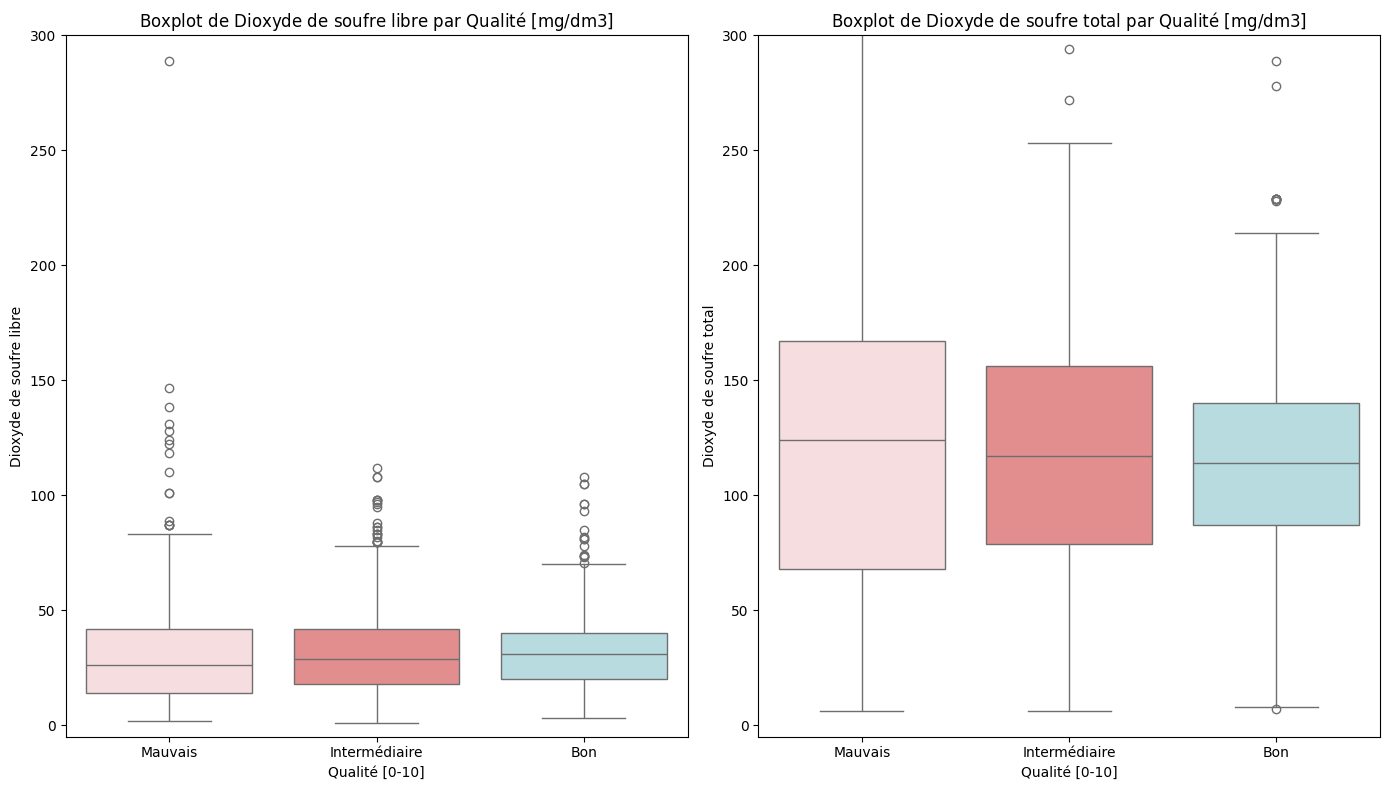

In [10]:
# Dicionário para renomear colunas
rename_columns = {
    'free sulfur dioxide': 'Dioxyde de soufre libre',
    'total sulfur dioxide': 'Dioxyde de soufre total'
}

# Renomear as colunas do dataframe
all_wines_renamed = all_wines.rename(columns=rename_columns)

# Criar um dicionário para mapear os valores de qualidade para as categorias desejadas
quality_mapping = {1: 'Mauvais', 2: 'Intermédiaire', 3: 'Bon'}

# Aplicar o mapeamento à coluna 'quality'
all_wines_renamed['quality'] = all_wines_renamed['quality'].map(quality_mapping)

# Configurar a figura para exibir boxplots
plt.figure(figsize=(14, 8))

# Iterar sobre as variáveis renomeadas para criar um boxplot para cada uma
for i, col in enumerate(rename_columns.values(), 1):
    plt.subplot(1, 2, i)  # Configurar subplots em uma linha e duas colunas

    # Criar o boxplot com seaborn
    sns.boxplot(data=all_wines_renamed, x='quality', y=col, palette=soft_palette)

    # Configurações do gráfico
    plt.title(f'Boxplot de {col} par Qualité [mg/dm$3$]')
    plt.xlabel('Qualité [0-10]')
    plt.ylabel(col)
    plt.ylim(-5, 300)  # Limites do eixo y

# Ajustar layout e exibir
plt.tight_layout()
plt.show()


vin rouge x vin blanc

C:\Users\USER-64\AppData\Local\Temp\ipykernel_17516\2076431976.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\USER-64\AppData\Local\Temp\ipykernel_17516\2076431976.py:35: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
C:\Users\USER-64\AppData\Local\Temp\ipykernel_17516\2076431976.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\USER-64\AppData\Local\Temp\ipykernel_17516\2076431976.py:41: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
C:\Users\USER-64\AppData\Local\Temp\ipyk

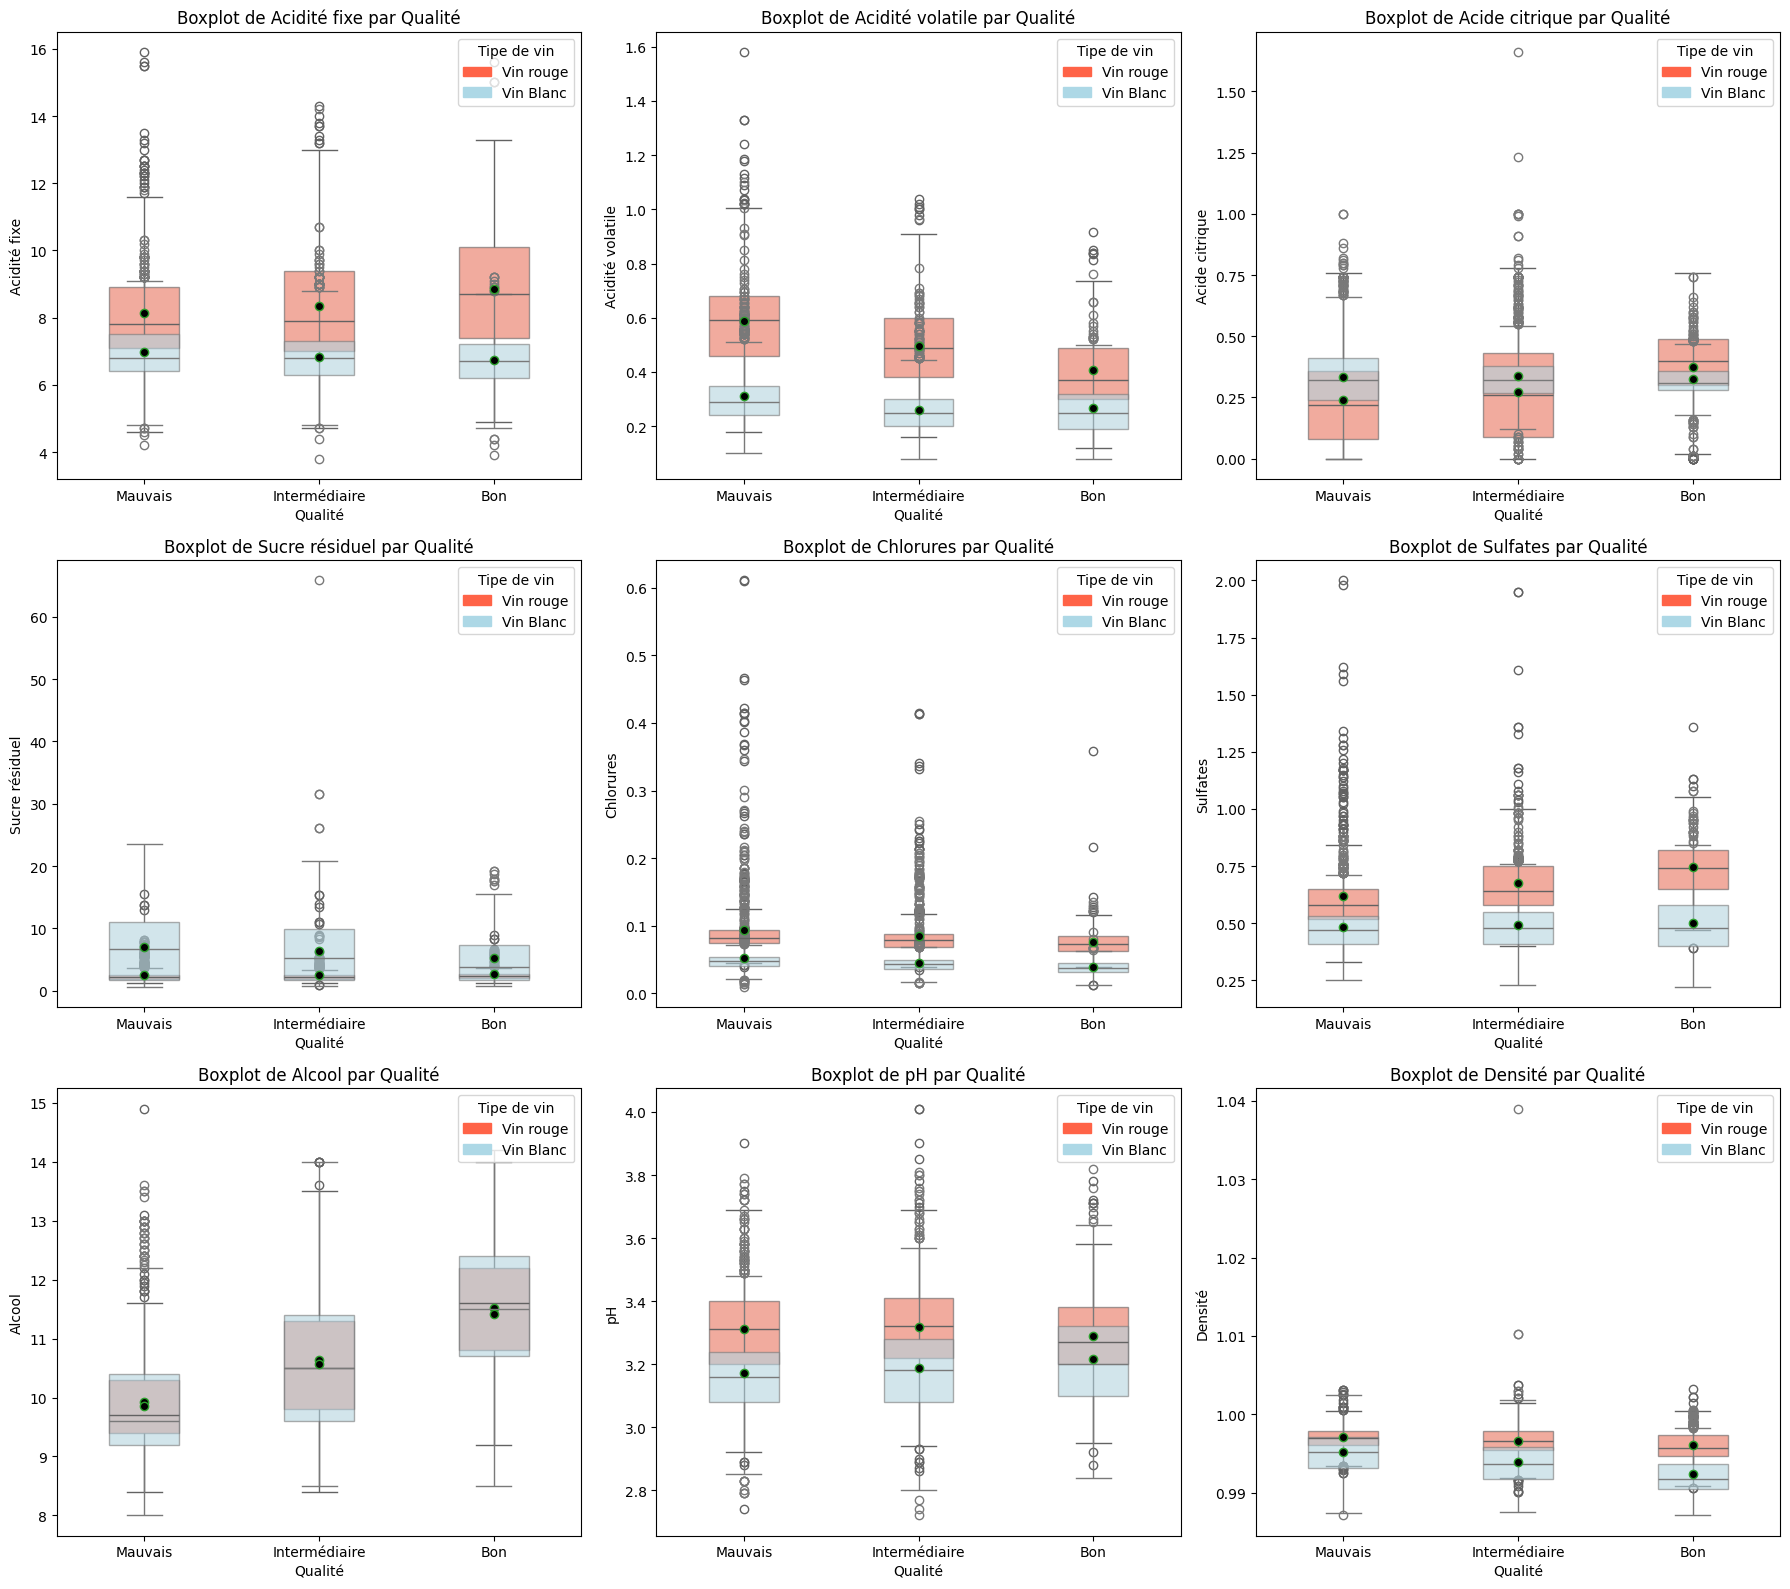

In [11]:
# Atualizar o dicionário para incluir pH e density
rename_columns = {
    'fixed acidity': 'Acidité fixe',
    'volatile acidity': 'Acidité volatile',
    'citric acid': 'Acide citrique',
    'residual sugar': 'Sucre résiduel',
    'chlorides': 'Chlorures',
    'sulphates': 'Sulfates',
    'alcohol': 'Alcool',
    'pH': 'pH',
    'density': 'Densité'
}

# Renomear as colunas do dataframe
all_wines_renamed = all_wines.rename(columns=rename_columns)

# Criar um dicionário para mapear os valores de qualidade para as categorias desejadas
quality_mapping = {1: 'Mauvais', 2: 'Intermédiaire', 3: 'Bon'}

# Aplicar o mapeamento à coluna 'quality'
all_wines_renamed['quality'] = all_wines_renamed['quality'].map(quality_mapping)

# Separar os dados por tipo de vinho
red_wine = all_wines_renamed[all_wines_renamed['type wine'] == 'red']
white_wine = all_wines_renamed[all_wines_renamed['type wine'] == 'white']

# Configurar a figura para exibir os boxplots
plt.figure(figsize=(18, 16))

# Iterar sobre as variáveis renomeadas para criar um boxplot para cada uma
for i, col in enumerate(rename_columns.values(), 1):
    plt.subplot(3, 3, i)  # Configurar subplots em grade (3 linhas, 3 colunas)

    # Boxplot para red wine
    sns.boxplot(
        data=red_wine, x='quality', y=col, palette=['#FF6347'],
        width=0.4, boxprops=dict(alpha=0.6), showmeans=True, meanprops={"marker": "o", "markerfacecolor": "black"}
    )

    # Boxplot para white wine
    sns.boxplot(
        data=white_wine, x='quality', y=col, palette=['#ADD8E6'],
        width=0.4, boxprops=dict(alpha=0.6), showmeans=True, meanprops={"marker": "o", "markerfacecolor": "black"}
    )

    # Configurações do gráfico
    plt.title(f'Boxplot de {col} par Qualité')
    plt.xlabel('Qualité')
    plt.ylabel(col)

    # Adicionar legenda
    red_patch = mpatches.Patch(color='#FF6347', label='Vin rouge')
    white_patch = mpatches.Patch(color='#ADD8E6', label='Vin Blanc')
    plt.legend(handles=[red_patch, white_patch], loc='upper right', title='Tipe de vin')

# Ajustar layout e exibir
plt.tight_layout()
plt.show()

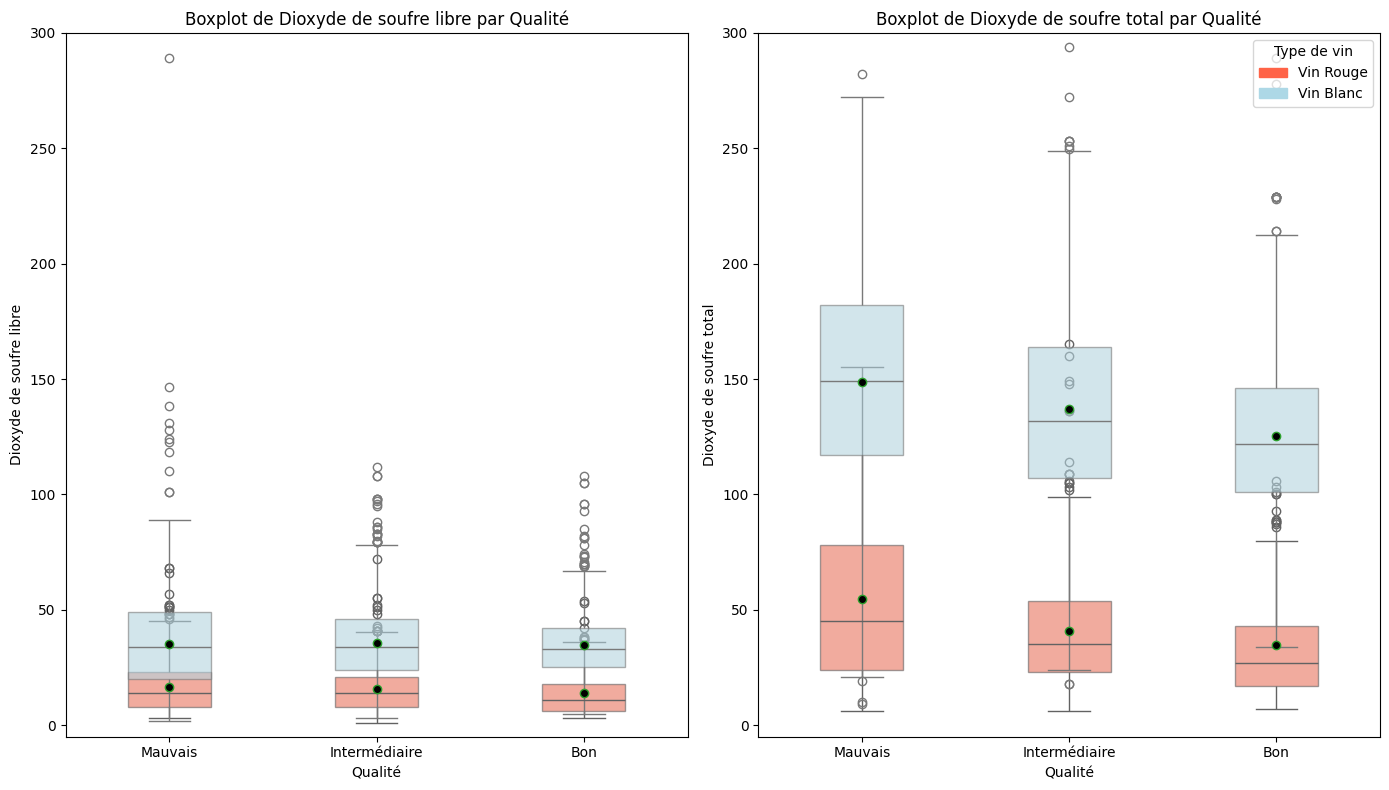

In [12]:
# Dicionário para renomear colunas
rename_columns = {

    'free sulfur dioxide': 'Dioxyde de soufre libre',
    'total sulfur dioxide': 'Dioxyde de soufre total'
}

# Renomear colunas
all_wines_renamed = all_wines_renamed.rename(columns=rename_columns)

# Mapeamento dos valores de qualidade
#quality_mapping = {1: 'mauvais', 2: 'intermédiaire', 3: 'bon'}
#all_wines_renamed['quality'] = all_wines_renamed['quality'].map(quality_mapping)

# Separar os dados por tipo de vinho
red_wine = all_wines_renamed[all_wines_renamed['type wine'] == 'red']
white_wine = all_wines_renamed[all_wines_renamed['type wine'] == 'white']

# Configurar a figura
plt.figure(figsize=(14, 8))

# Criar boxplots sobrepostos para cada variável
for i, col in enumerate(rename_columns.values(), 1):
    plt.subplot(1, 2, i)  # Subplots em uma linha e duas colunas

    # Boxplot para red wine
    sns.boxplot(
        data=red_wine, x='quality', y=col,
        color='#FF6347', width=0.4, boxprops=dict(alpha=0.6), showmeans=True,
        meanprops={"marker": "o", "markerfacecolor": "black"}
    )

    # Boxplot para white wine
    sns.boxplot(
        data=white_wine, x='quality', y=col,
        color='#ADD8E6', width=0.4, boxprops=dict(alpha=0.6), showmeans=True,
        meanprops={"marker": "o", "markerfacecolor": "black"}
    )

    # Configurações dos gráficos
    plt.title(f'Boxplot de {col} par Qualité')
    plt.xlabel('Qualité')
    plt.ylabel(col)
    plt.ylim(-5, 300)  # Ajustar limite do eixo y

# Adicionar legenda
red_patch = mpatches.Patch(color='#FF6347', label='Vin Rouge')
white_patch = mpatches.Patch(color='#ADD8E6', label='Vin Blanc')
plt.legend(handles=[red_patch, white_patch], loc='upper right', title='Type de vin')

# Ajustar o layout e exibir
plt.tight_layout()
plt.show()



### Nuages de points

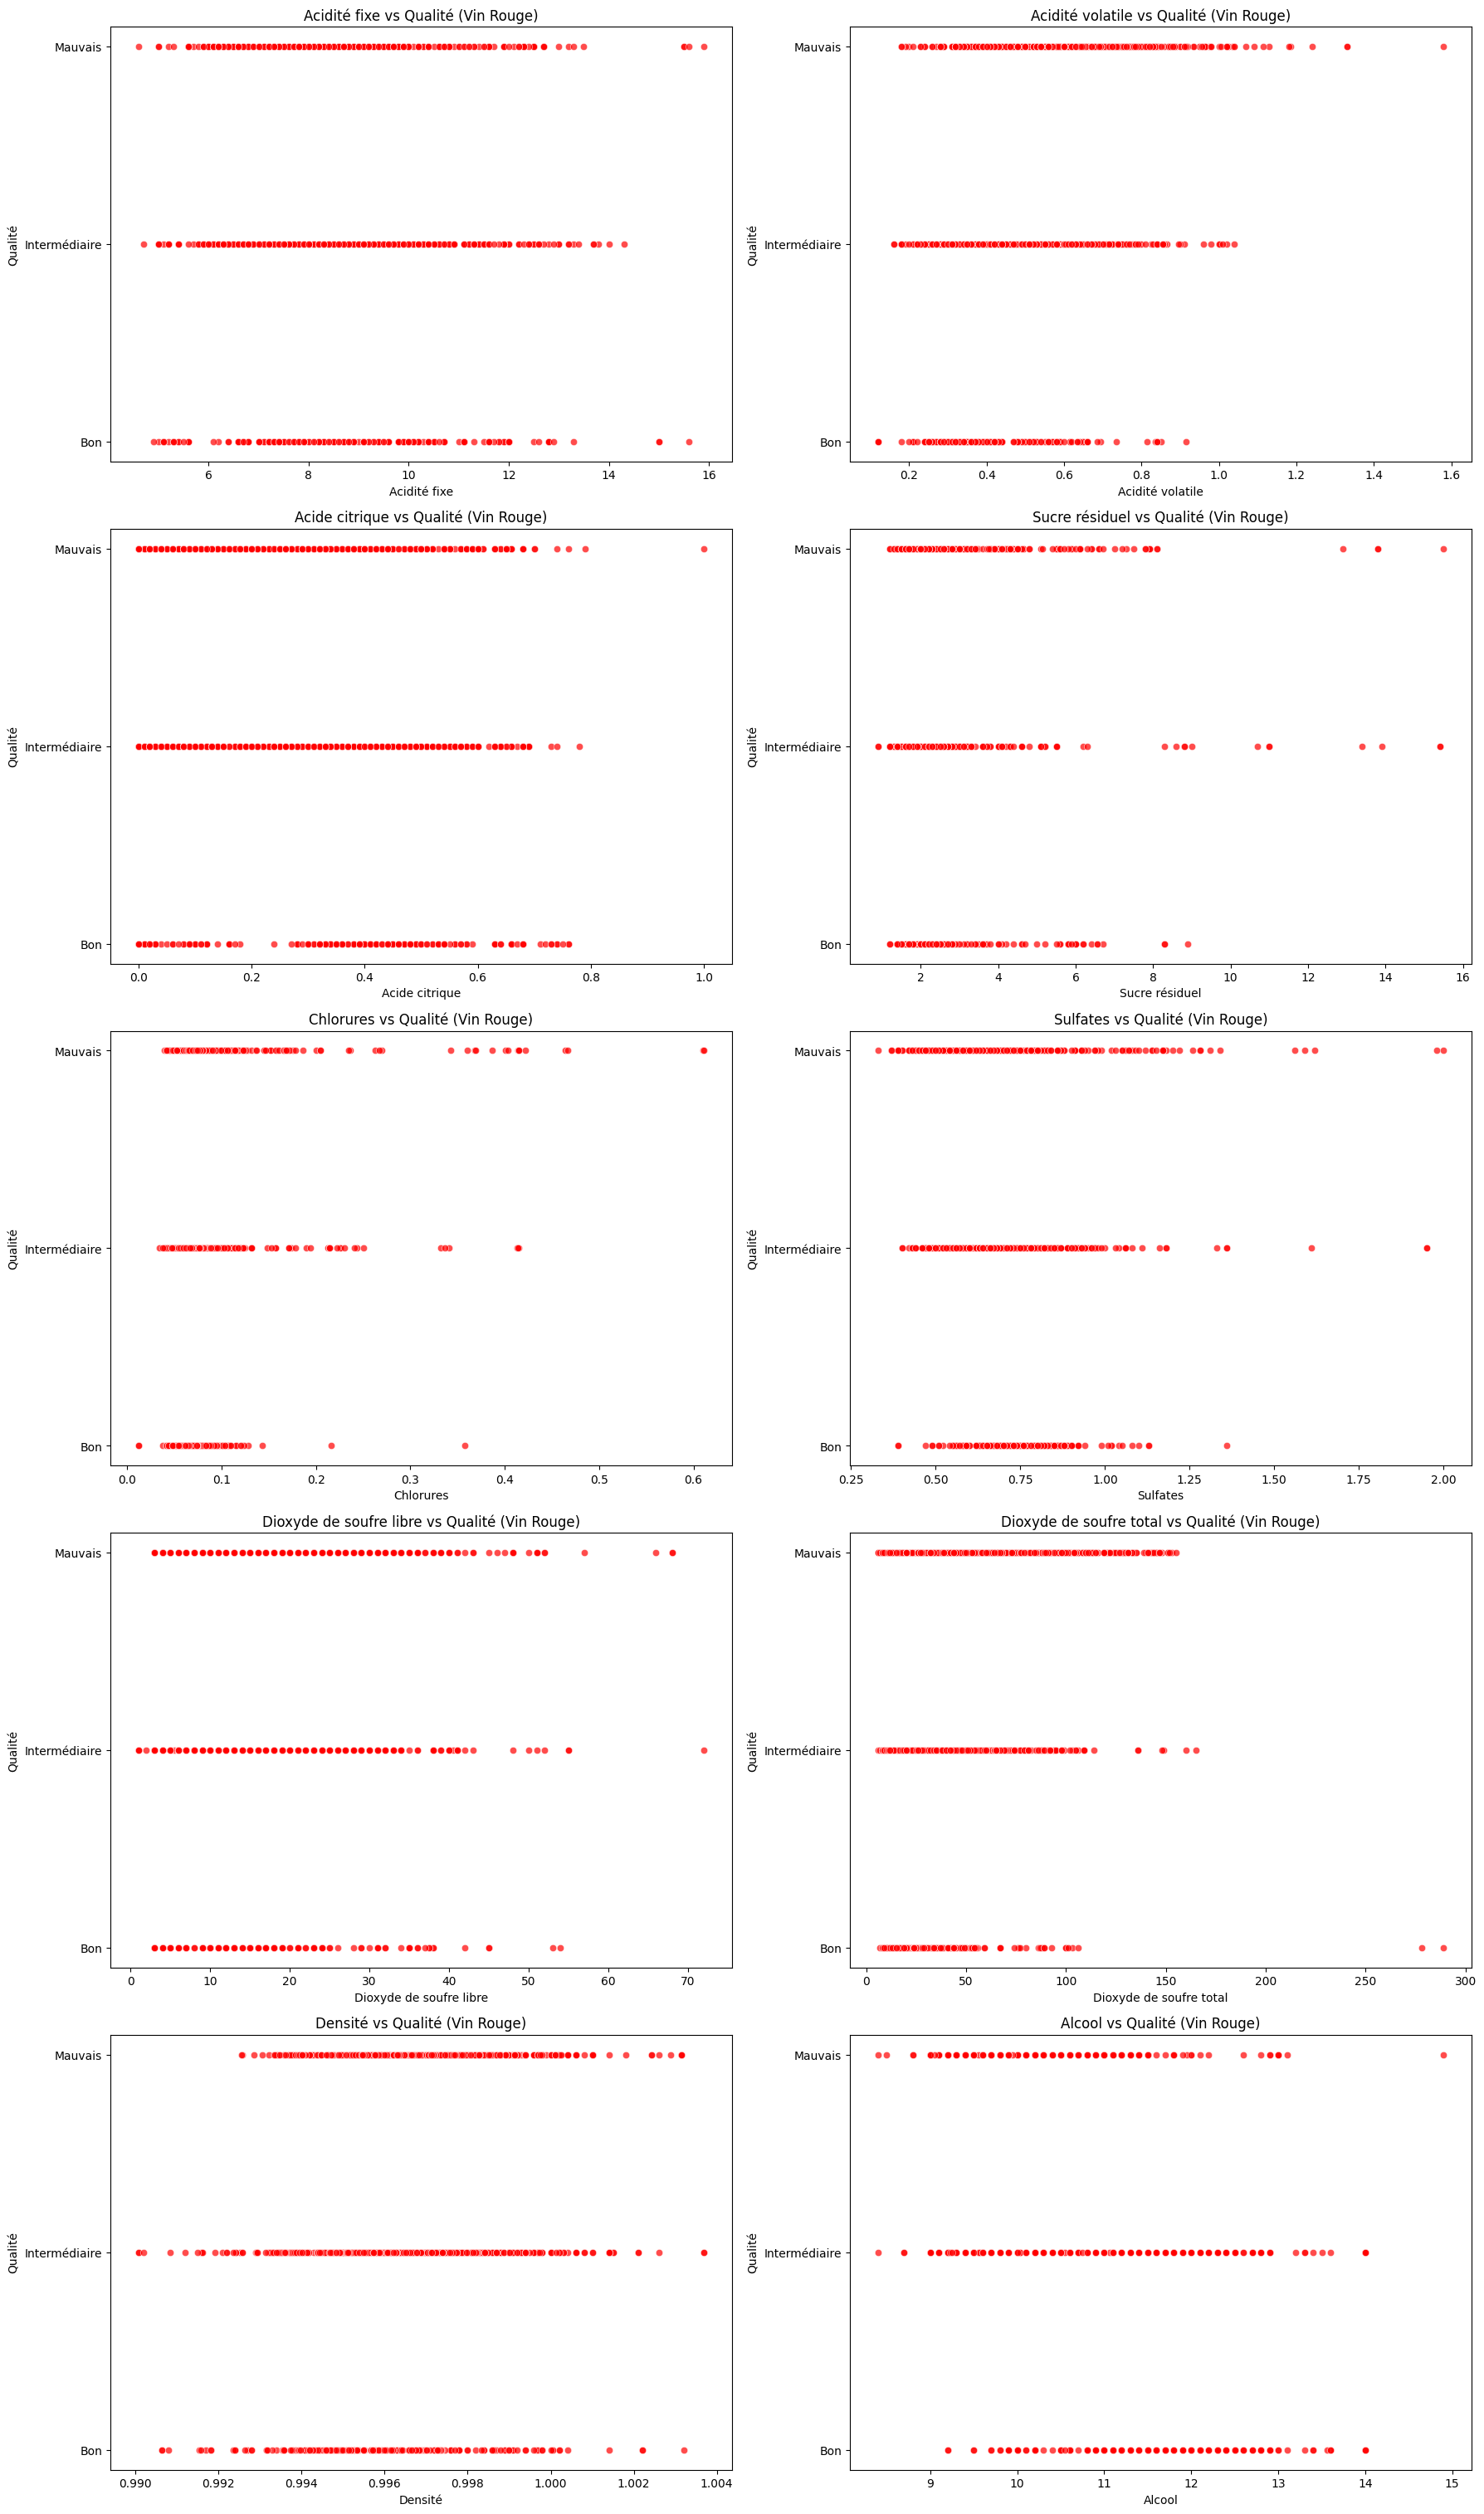

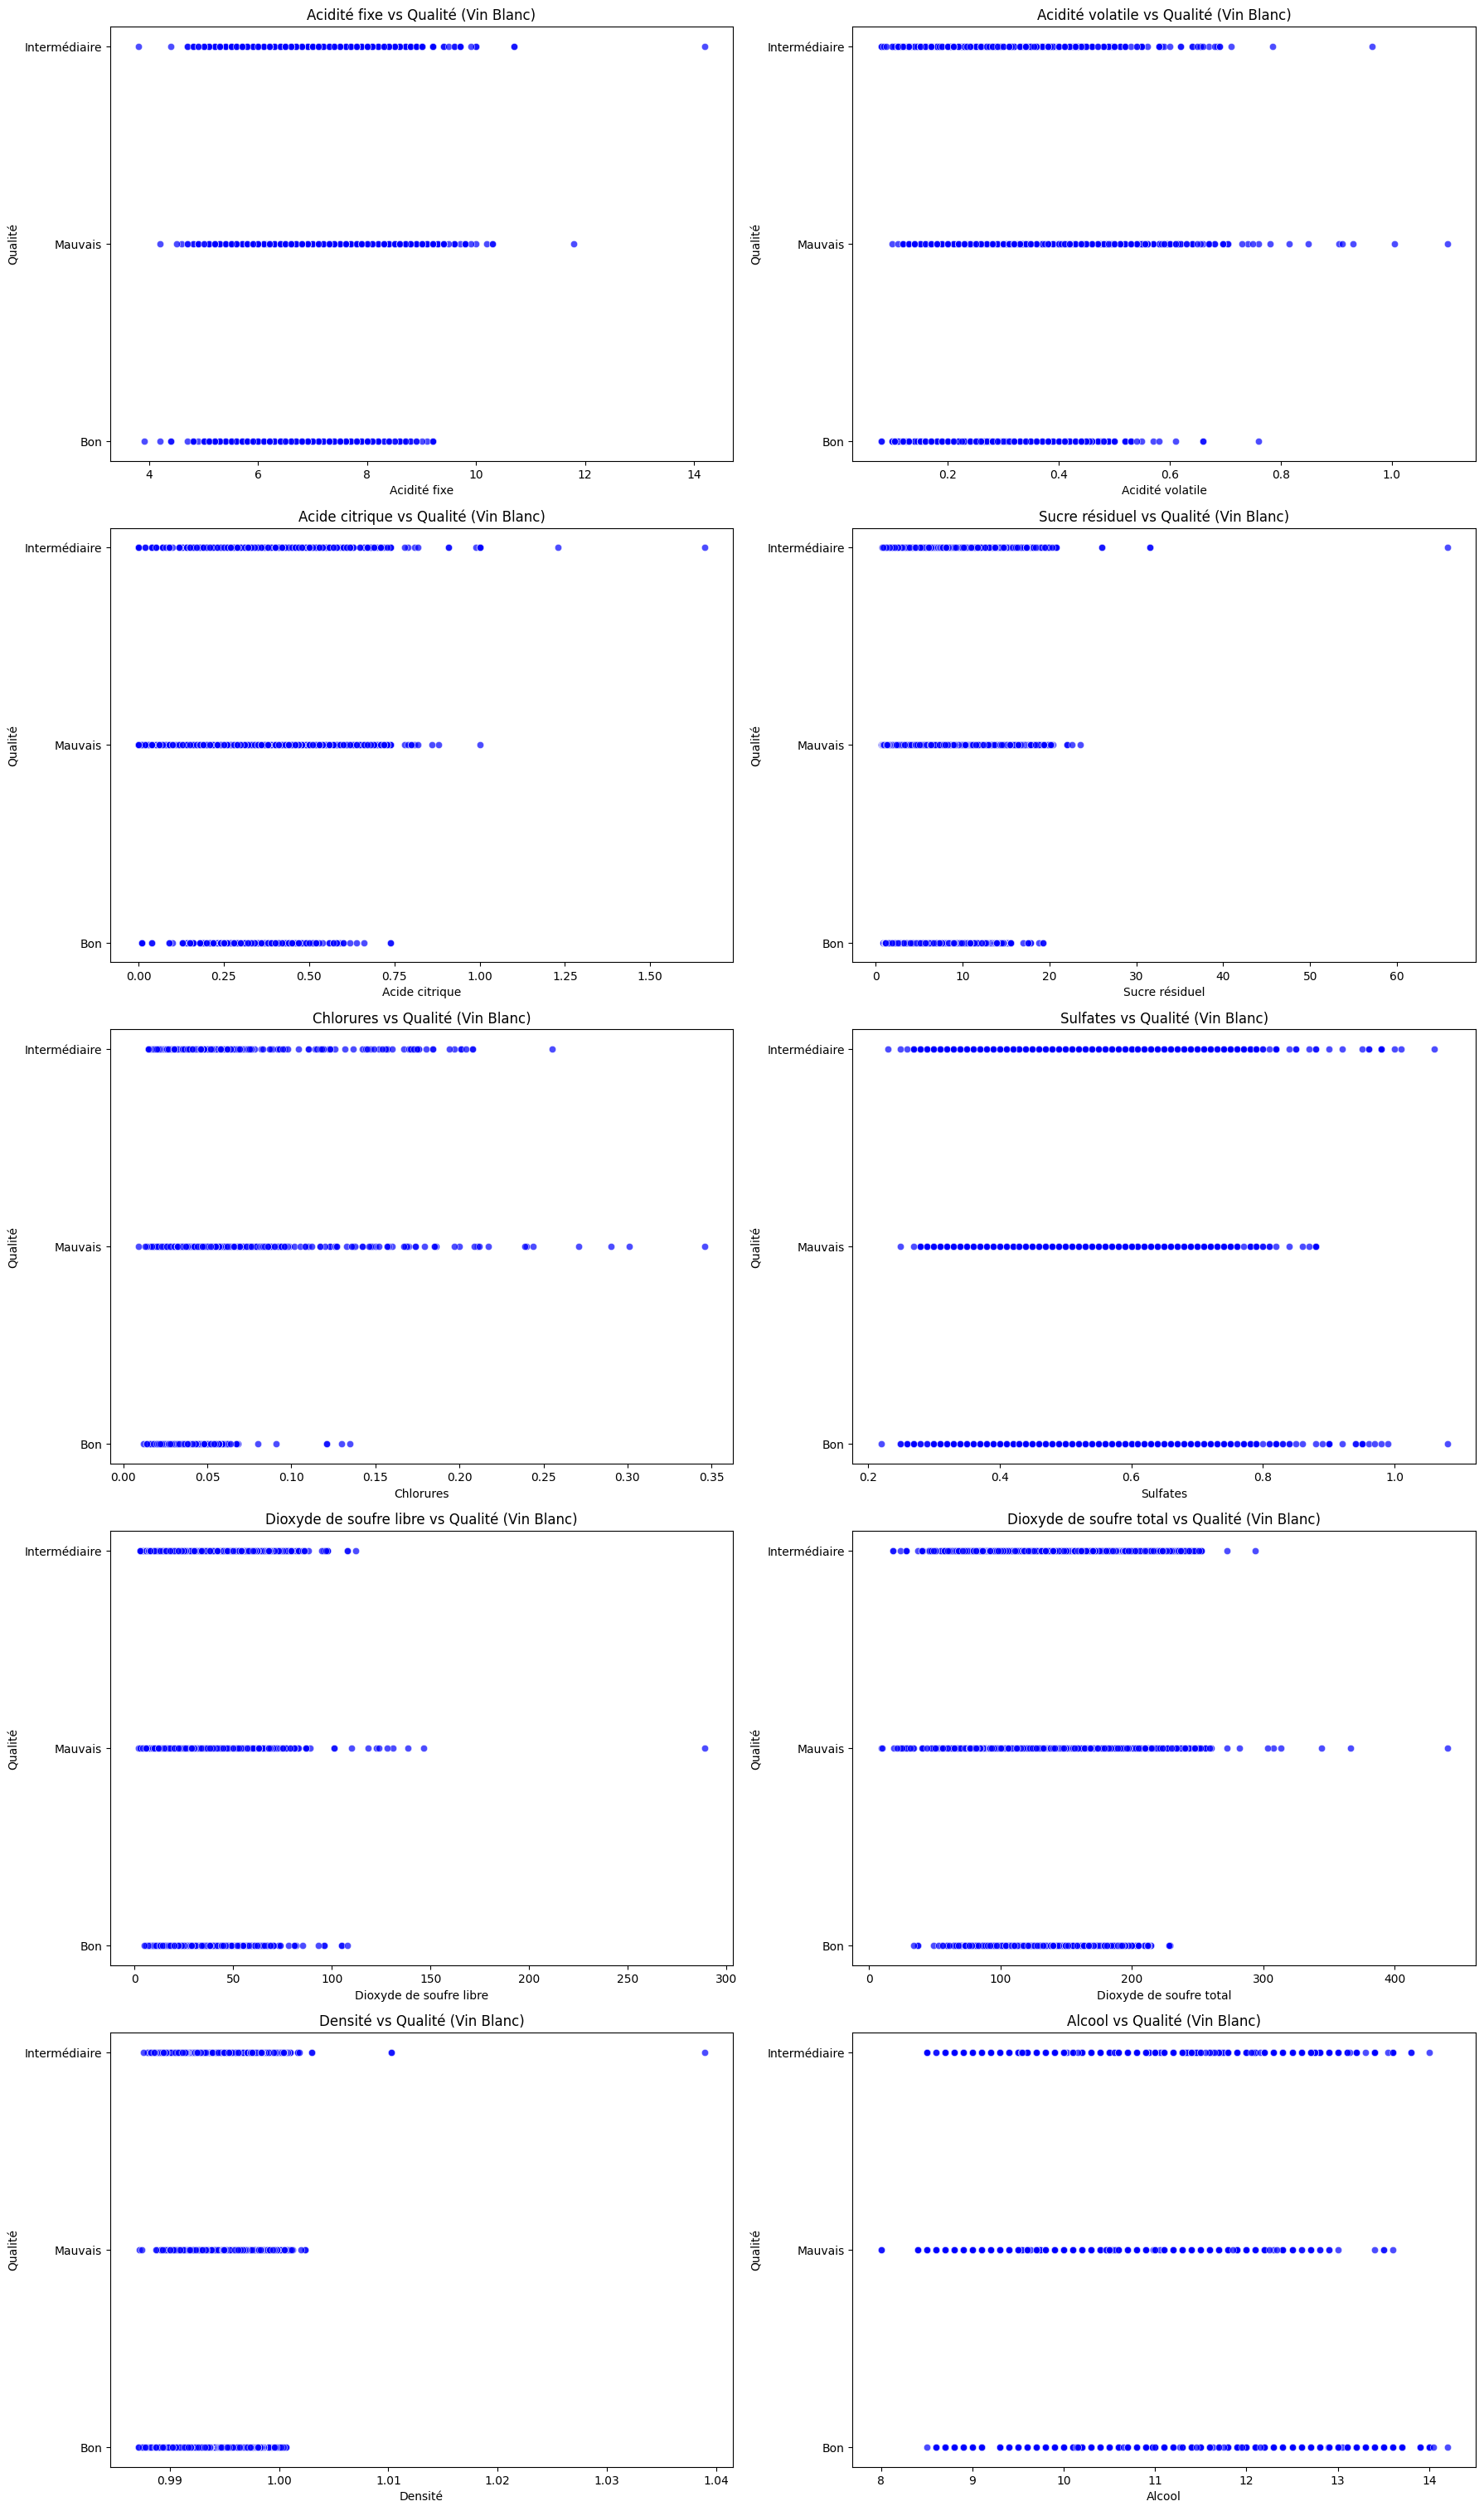

In [13]:
# Mapear os nomes das colunas para o idioma francês
columns_map = {
    'fixed acidity': 'Acidité fixe',
    'volatile acidity': 'Acidité volatile',
    'citric acid': 'Acide citrique',
    'residual sugar': 'Sucre résiduel',
    'chlorides': 'Chlorures',
    'sulphates': 'Sulfates',
    'free sulfur dioxide': 'Dioxyde de soufre libre',
    'total sulfur dioxide': 'Dioxyde de soufre total',
    'density': 'Densité',
    'alcohol': 'Alcool',
    'quality': 'Qualité'
}

# Renomear as colunas dos DataFrames
red_wine = red_wine.rename(columns=columns_map)
white_wine = white_wine.rename(columns=columns_map)

# Atualizar a lista de colunas
columns = list(columns_map.values())

# Gráficos para red wine
plt.figure(figsize=(18, 36))  # Ajustar o tamanho para incluir todos os gráficos
for i, var in enumerate(columns[:-1], 1):  # Ignorar 'Qualité' na lista de colunas
    plt.subplot(6, 2, i)
    sns.scatterplot(data=red_wine, x=var, y='Qualité', color='red', alpha=0.7)
    plt.title(f'{var} vs Qualité (Vin Rouge)', fontsize=12)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Qualité', fontsize=10)

plt.tight_layout()
plt.show()

# Gráficos para white wine
plt.figure(figsize=(18, 36))  # Ajustar o tamanho para incluir todos os gráficos
for i, var in enumerate(columns[:-1], 1):  # Ignorar 'Qualité' na lista de colunas
    plt.subplot(6, 2, i)
    sns.scatterplot(data=white_wine, x=var, y='Qualité', color='blue', alpha=0.7)
    plt.title(f'{var} vs Qualité (Vin Blanc)', fontsize=12)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Qualité', fontsize=10)

plt.tight_layout()
plt.show()



### Matrix correlation


tous les vins

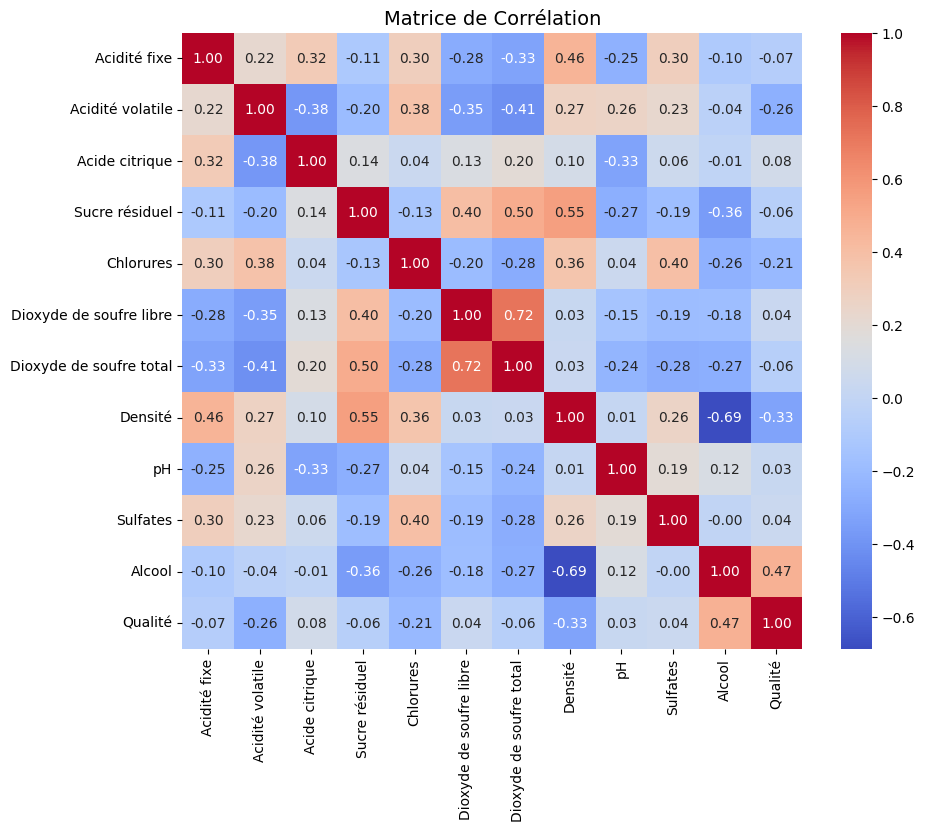

In [14]:
all_wines_numbers = all_wines.drop(columns=['type wine'])

columns_new_names = [
    'Acidité fixe',
    'Acidité volatile',
    'Acide citrique',
    'Sucre résiduel',
    'Chlorures',
    'Dioxyde de soufre libre',
    'Dioxyde de soufre total',
    'Densité',
    'pH', 'Sulfates',
    'Alcool', 'Qualité'
]

# Renomear as colunas do dataframe para os nomes em francês
all_wines_numbers.columns = columns_new_names

# Calcular a matriz de correlação
correlation_matrix = all_wines_numbers.corr()

# Exibir a matriz de correlação com heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=columns_new_names, yticklabels=columns_new_names)
plt.title("Matrice de Corrélation", fontsize=14)
plt.show()

vins rouge

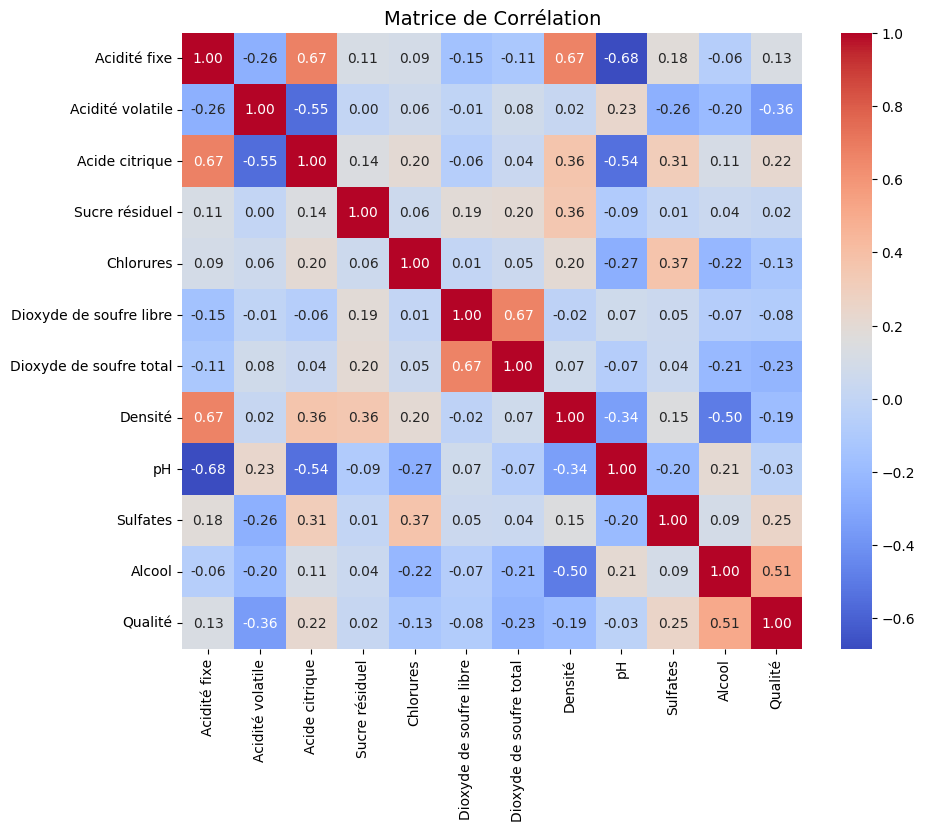

In [15]:
# Removendo a coluna 'wine type'
red_wine_numbers = red_wine.drop(columns=['type wine'])

# Mapeamento dos valores de qualidade
quality_mapping = {'Mauvais':1, 'Intermédiaire':2, 'Bon':3}
red_wine_numbers['Qualité'] = red_wine_numbers['Qualité'].map(quality_mapping)


red_correlation_matrix = red_wine_numbers.corr()
red_correlation_matrix.head(10)
plt.figure(figsize=(10,8))
sns.heatmap(red_correlation_matrix,annot=True,cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation", fontsize=14)
plt.show()

vin blanc

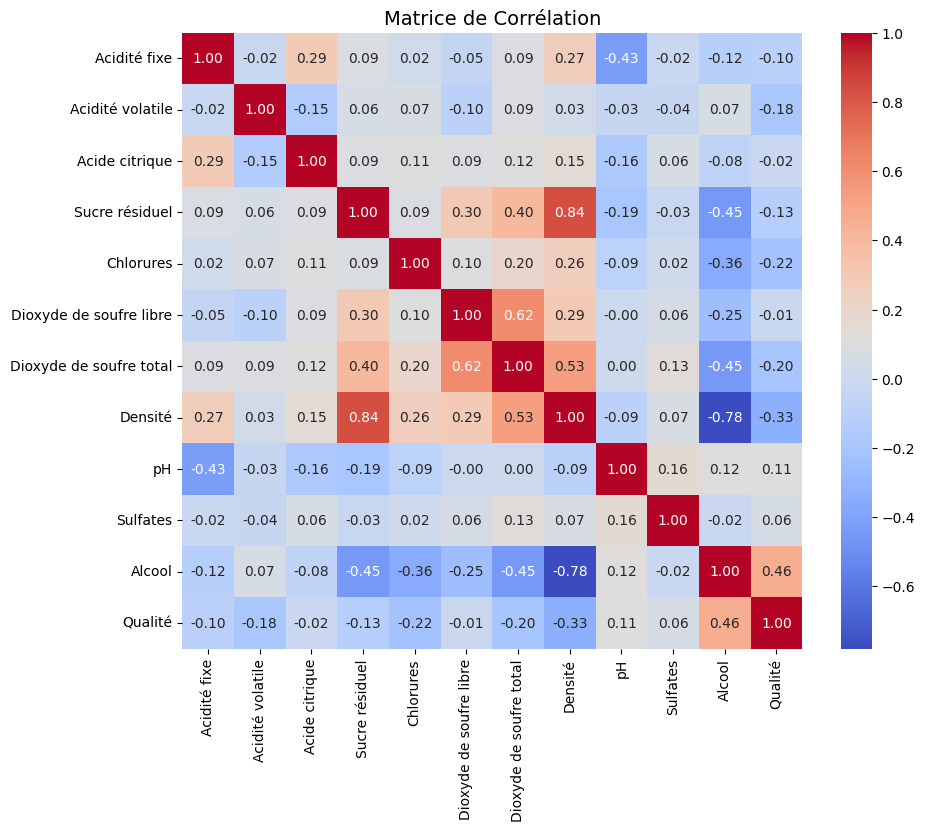

In [16]:
# Removendo a coluna 'wine type'
white_wine_numbers = white_wine.drop(columns=['type wine'])

# Mapeamento dos valores de qualidade
quality_mapping = {'Mauvais':1, 'Intermédiaire':2, 'Bon':3}
white_wine_numbers['Qualité'] = white_wine_numbers['Qualité'].map(quality_mapping)


red_correlation_matrix = white_wine_numbers.corr()
red_correlation_matrix.head(10)
plt.figure(figsize=(10,8))
sns.heatmap(red_correlation_matrix,annot=True,cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation", fontsize=14)
plt.show()

In [17]:
def ACP_fonc(data_acp,
             inerties='non', n_cp=None, ech_iner_x=6, ech_iner_y=4,
             cercle='non', ech_cer=8,
             projection='non', label_indiv='non', ech_pr_x=5, ech_pr_y=4,
             cp_x=1, cp_y=2):

    n = data_acp.shape[0]
    p = data_acp.shape[1]

    # Ajustar n_cp se não especificado ou for maior que o número de colunas
    if n_cp is None or n_cp > p:
        n_cp = p

    norm = StandardScaler(with_mean=True, with_std=True)
    data_acp_norm = norm.fit_transform(data_acp)

    acp_model = decomposition.PCA(n_components=n_cp, svd_solver='full')
    acp_out = acp_model.fit(data_acp_norm)

    val_prop = (n-1)/n * acp_out.explained_variance_
    part_inertie_expl = acp_out.explained_variance_ratio_

    if inerties == 'oui':
        plt.subplots(figsize=(ech_iner_x, ech_iner_y))
        plt.bar(np.arange(1, n_cp+1), val_prop)
        plt.title('Eboulis des valeurs propres')
        plt.xlabel('Composante principale')
        plt.ylabel('Valeur propre')
        plt.show()

        plt.subplots(figsize=(ech_iner_x, ech_iner_y))
        plt.bar(np.arange(1, n_cp+1), part_inertie_expl * 100)
        plt.title("Part d'inertie expliquée (%)")
        plt.xlabel('Composante principale')
        plt.ylabel('Pourcentage')
        plt.show()

        plt.subplots(figsize=(ech_iner_x, ech_iner_y))
        plt.bar(np.arange(1, n_cp+1), np.cumsum(part_inertie_expl) * 100)
        plt.title("Part d'inertie expliquée cumulée (%)")
        plt.xlabel('Nombre de composantes principales')
        plt.ylabel('Pourcentage')
        plt.show()

    coord = acp_out.transform(data_acp_norm)
    data_acp_out = data_acp.copy()

    for i in range(n_cp):
        data_acp_out['CP_'+str(i+1)] = coord[:, i]

    cos2 = coord**2
    for i in range(n_cp):
        data_acp_out['Cos2_'+str(i+1)] = cos2[:, i] / np.sum(data_acp_norm**2, axis=1)

    ctr = coord**2
    for i in range(n_cp):
        data_acp_out['CTR_'+str(i+1)] = ctr[:, i] / (n * val_prop[i])

    if cercle == 'oui':
        cor_var = np.zeros((p, n_cp))
        for i in range(n_cp):
            cor_var[:, i] = acp_out.components_[i, :] * np.sqrt((n-1)/n * acp_out.explained_variance_)[i]
        an = np.linspace(0, 2*np.pi, 100)
        fig, ax = plt.subplots(figsize=(ech_cer, ech_cer))
        for i in range(p):
            ax.arrow(0,
                     0,
                     cor_var[i, cp_x-1],
                     cor_var[i, cp_y-1],
                     head_width=0.03,
                     head_length=0.03,
                     length_includes_head=True)
            ax.text(cor_var[i, cp_x-1]+0.01,
                     cor_var[i, cp_y-1],
                     data_acp.columns.values[i],
                     c='red',fontsize=8)
        ax.plot(np.cos(an), np.sin(an))
        ax.axhline(y=0)
        ax.axvline(x=0)
        ax.axis('equal')
        ax.set_xlabel('CP {}'.format(cp_x))
        ax.set_ylabel('CP {}'.format(cp_y))
        ax.set_title('Cercle de corrélations')
        plt.show()

    if projection == 'oui':
        fig, ax = plt.subplots(figsize=(2*ech_pr_x, 2*ech_pr_y))
        ax.axis('equal')
        ax.set_xlim(-ech_pr_x, ech_pr_y)
        ax.set_ylim(-ech_pr_x, ech_pr_y)
        ax.scatter(data_acp_out['CP_'+str(cp_x)], data_acp_out['CP_'+str(cp_y)], s=40)
        ax.axhline(y=0)
        ax.axvline(x=0)
        ax.set_xlabel('CP {}'.format(cp_x))
        ax.set_ylabel('CP {}'.format(cp_y))
        ax.set_title('Projection des individus')
        if label_indiv == 'oui':
            for i in range(n):
                ax.annotate(data_acp.index[i], (data_acp_out['CP_'+str(cp_x)].iloc[i]+0.1, data_acp_out['CP_'+str(cp_y)].iloc[i]+0.1))
        plt.show()

    return acp_out, data_acp_out

### circle des corrélations


tous les vins

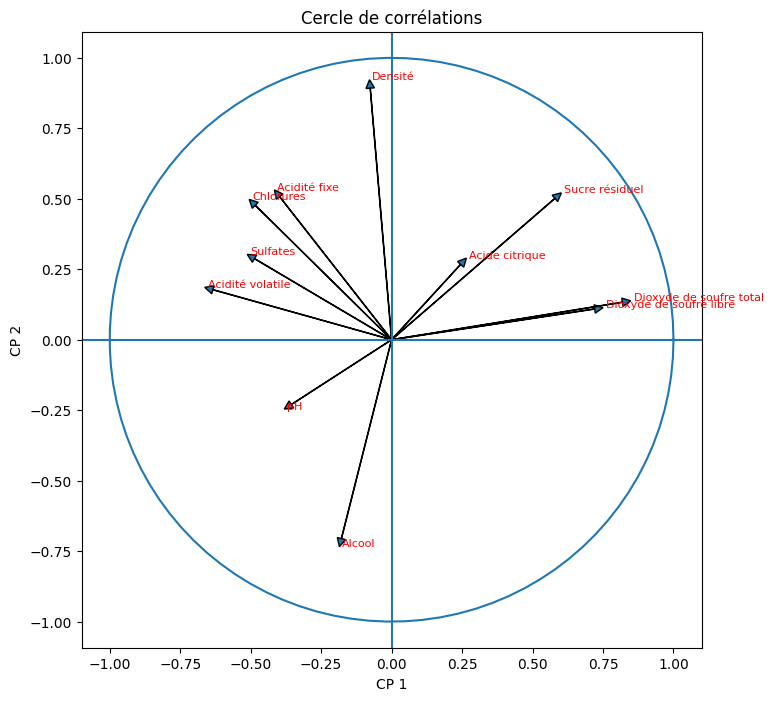

(PCA(n_components=11, svd_solver='full'),
       Acidité fixe  Acidité volatile  Acide citrique  Sucre résiduel  \
 0              7.4              0.70            0.00             1.9   
 1              7.8              0.88            0.00             2.6   
 2              7.8              0.76            0.04             2.3   
 3             11.2              0.28            0.56             1.9   
 4              7.4              0.70            0.00             1.9   
 ...            ...               ...             ...             ...   
 6492           6.2              0.21            0.29             1.6   
 6493           6.6              0.32            0.36             8.0   
 6494           6.5              0.24            0.19             1.2   
 6495           5.5              0.29            0.30             1.1   
 6496           6.0              0.21            0.38             0.8   
 
       Chlorures  Dioxyde de soufre libre  Dioxyde de soufre total  Densité  \
 

In [18]:
data_acp_wines = all_wines_numbers.drop(['Qualité'], axis=1)

columns_new_names = [
    'Acidité fixe',
    'Acidité volatile',
    'Acide citrique',
    'Sucre résiduel',
    'Chlorures',
    'Dioxyde de soufre libre',
    'Dioxyde de soufre total',
    'Densité',
    'pH', 'Sulfates',
    'Alcool'
]

data_acp_wines.columns = columns_new_names


ACP_fonc(data_acp=data_acp_wines, cercle='oui', cp_x=1, cp_y=2)

vin rouge

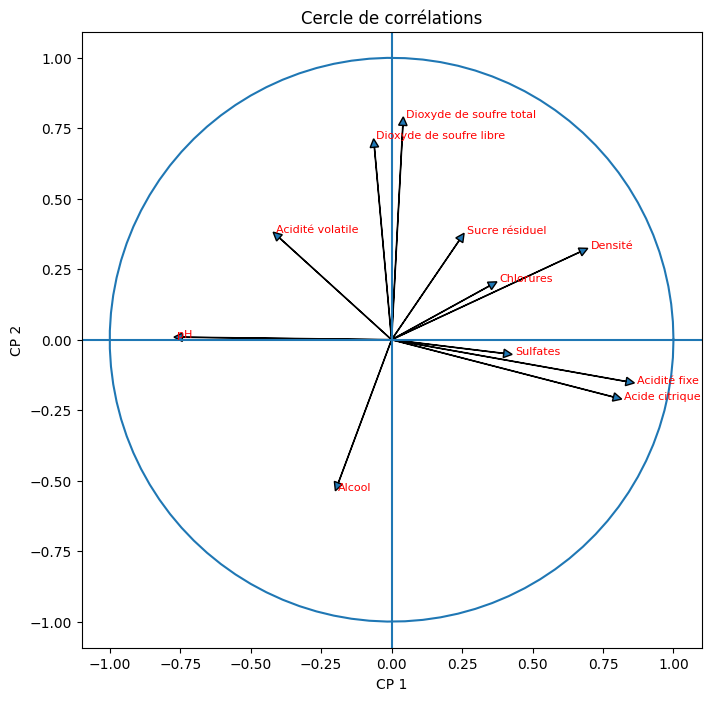

(PCA(n_components=11, svd_solver='full'),
       Acidité fixe  Acidité volatile  Acide citrique  Sucre résiduel  \
 0              7.4             0.700            0.00             1.9   
 1              7.8             0.880            0.00             2.6   
 2              7.8             0.760            0.04             2.3   
 3             11.2             0.280            0.56             1.9   
 4              7.4             0.700            0.00             1.9   
 ...            ...               ...             ...             ...   
 1594           6.2             0.600            0.08             2.0   
 1595           5.9             0.550            0.10             2.2   
 1596           6.3             0.510            0.13             2.3   
 1597           5.9             0.645            0.12             2.0   
 1598           6.0             0.310            0.47             3.6   
 
       Chlorures  Dioxyde de soufre libre  Dioxyde de soufre total  Densité  \
 

In [19]:
data_acp_red_wine= red_wine.drop(['Qualité','type wine'], axis=1)
data_acp_red_wine.columns = columns_new_names
ACP_fonc(data_acp=data_acp_red_wine, cercle='oui', cp_x=1, cp_y=2)

vin blanc

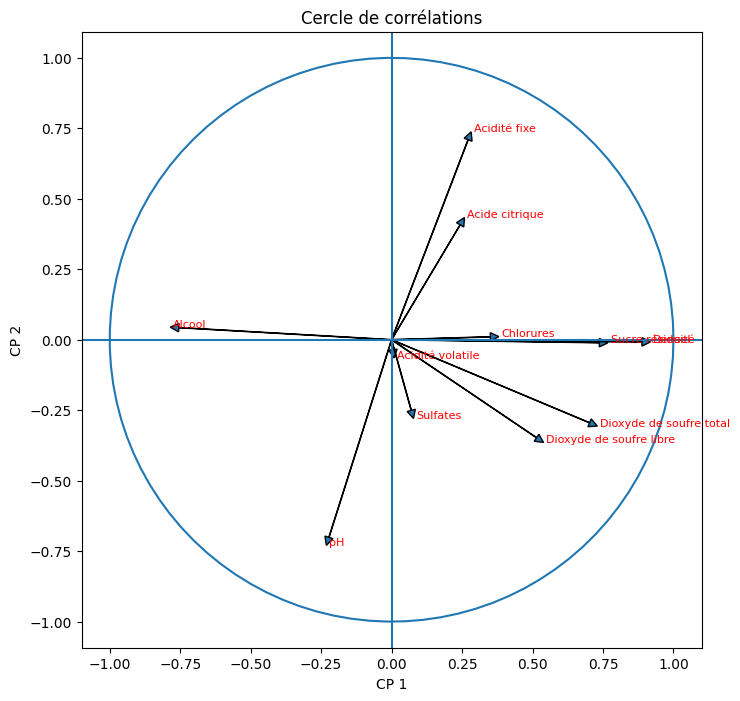

(PCA(n_components=11, svd_solver='full'),
       Acidité fixe  Acidité volatile  Acide citrique  Sucre résiduel  \
 1599           7.0              0.27            0.36            20.7   
 1600           6.3              0.30            0.34             1.6   
 1601           8.1              0.28            0.40             6.9   
 1602           7.2              0.23            0.32             8.5   
 1603           7.2              0.23            0.32             8.5   
 ...            ...               ...             ...             ...   
 6492           6.2              0.21            0.29             1.6   
 6493           6.6              0.32            0.36             8.0   
 6494           6.5              0.24            0.19             1.2   
 6495           5.5              0.29            0.30             1.1   
 6496           6.0              0.21            0.38             0.8   
 
       Chlorures  Dioxyde de soufre libre  Dioxyde de soufre total  Densité  \
 

In [20]:
data_acp_white_wine= white_wine.drop(['Qualité','type wine'], axis=1)
data_acp_white_wine.columns = columns_new_names
ACP_fonc(data_acp=data_acp_white_wine, cercle='oui', cp_x=1, cp_y=2)

### K-means

vin rouge

In [37]:
data_cluster_red = data_acp_red_wine

# on choisit 3 clusters
k = 4


kmeans_model = KMeans(init='k-means++', max_iter=100, n_clusters=k, n_init=10)
kmeans = kmeans_model.fit(data_cluster_red)

red_wine_numbers['cluster_kmeans'] = kmeans.fit_predict(data_cluster_red)
red_wine_numbers['cluster_kmeans'].value_counts()

cluster_kmeans
0    715
3    516
2    265
1    103
Name: count, dtype: int64

In [22]:
k_max = 10

inertie_intra = pd.DataFrame(columns=['k', 'inertie_intra'])

for k in range(1, k_max+1):
    kmeans_model = KMeans(init='k-means++', max_iter=100, n_clusters=k, n_init=10)
    kmeans = kmeans_model.fit(data_cluster_red)
    inertie_intra.loc[k-1,'k'] = k
    inertie_intra.loc[k-1,'inertie_intra'] = kmeans.inertia_

inertie_intra['part_inertie_intra'] = inertie_intra['inertie_intra'] / inertie_intra['inertie_intra'][0]

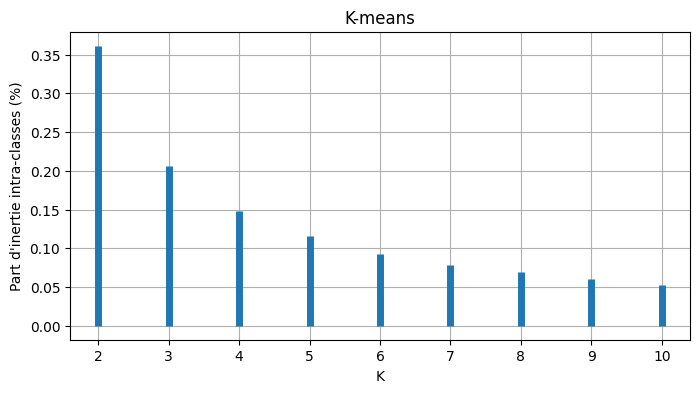

In [23]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.vlines(inertie_intra.iloc[1:]['k'], 0, inertie_intra.iloc[1:]['part_inertie_intra'], linewidth=5)
ax.grid()
ax.set_xlabel('K')
ax.set_ylabel("Part d'inertie intra-classes (%)")
plt.title('K-means')
plt.show()

vin blanc

In [35]:
data_cluster_white = data_acp_white_wine

# on choisit 3 clusters
k = 3


kmeans_model = KMeans(init='k-means++', max_iter=100, n_clusters=k, n_init=10)
kmeans = kmeans_model.fit(data_cluster_white)

white_wine_numbers['cluster_kmeans'] = kmeans.fit_predict(data_cluster_white)
white_wine_numbers['cluster_kmeans'].value_counts()

cluster_kmeans
0    1979
1    1798
2    1121
Name: count, dtype: int64

In [25]:
k_max = 10

inertie_intra = pd.DataFrame(columns=['k', 'inertie_intra'])

for k in range(1, k_max+1):
    kmeans_model = KMeans(init='k-means++', max_iter=100, n_clusters=k, n_init=10)
    kmeans = kmeans_model.fit(data_cluster_white)
    inertie_intra.loc[k-1,'k'] = k
    inertie_intra.loc[k-1,'inertie_intra'] = kmeans.inertia_

inertie_intra['part_inertie_intra'] = inertie_intra['inertie_intra'] / inertie_intra['inertie_intra'][0]

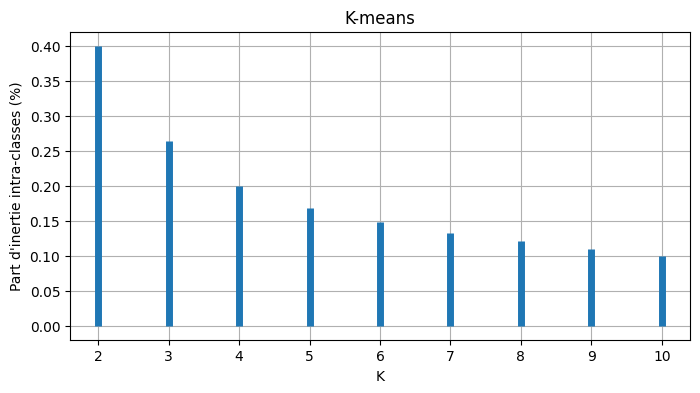

In [26]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.vlines(inertie_intra.iloc[1:]['k'], 0, inertie_intra.iloc[1:]['part_inertie_intra'], linewidth=5)
ax.grid()
ax.set_xlabel('K')
ax.set_ylabel("Part d'inertie intra-classes (%)")
plt.title('K-means')
plt.show()

### Régression liner

vin rouge

In [38]:
# regressao liner multipla

var_y = 'Qualité'
y = red_wine_numbers[var_y]

var_x = ['Acidité fixe', 'Acidité volatile', 'Acide citrique', 'Sucre résiduel', 'Chlorures',
           'Dioxyde de soufre libre', 'Dioxyde de soufre total', 'Densité', 'pH', 'Sulfates','Alcool']
X = red_wine_numbers[var_x]


linreg_sel_model = OLS(y, add_constant(X))
linreg_sel = linreg_sel_model.fit()
linreg_sel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Qualité   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     89.47
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          1.50e-157
Time:                        22:04:23   Log-Likelihood:                -1316.6
No. Observations:                1599   AIC:                             2657.
Df Residuals:                    1587   BIC:                             2722.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      43.1489     18.099      2.384      0.017       7.649      78.649
Acidité fixe                0.0573      0.022      2.586      0.010       0.014       0.101
Acidité volatile           -0.7438      0.103     -7.192      0.000      -0.947      -0.541
Acide citrique             -0.1026      0.126     -0.816      0.414      -0.349       0.144
Sucre résiduel              0.0330      0.013      2.574      0.010       0.008       0.058
Chlorures                  -1.4360      0.358     -4.011      0.000      -2.138      -0.734
Dioxyde de soufre libre     0.0039      0.002      2.109      0.035       0.000       0.008
Dioxyde de soufre total    -0.0038      0.001     -6.130      0.000      -0.005      -0.003
Densité                   -44.3128     18.473     -2.399      0.017     -80.547      -8.078
pH                         -0.0508      0.164     -0.311      0.756      -0.372       0.270
Sulfates                    0.8643      0.098      8.852      0.000       0.673       1.056
Alcool                      0.2293      0.023     10.141      0.000       0.185       0.274
==============================================================================
Omnibus:                       13.579   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.445
Skew:                           0.204   Prob(JB):                      0.00120
Kurtosis:                       2.812   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

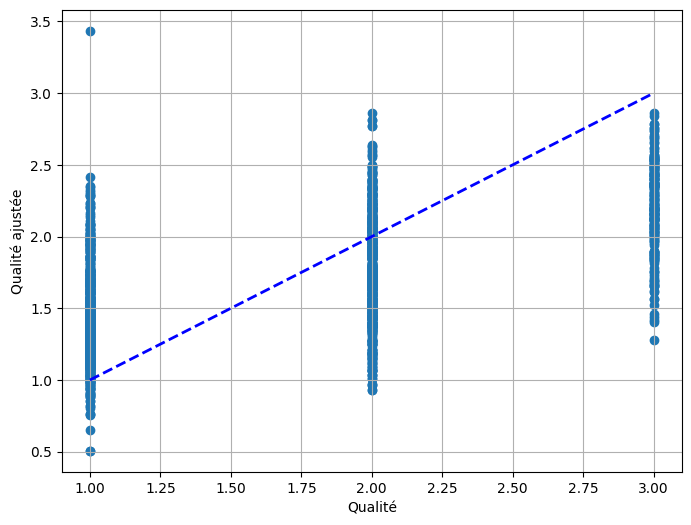

In [39]:
# analyse de l'ajustement
red_wine_numbers['quality_ajust'] = linreg_sel.fittedvalues

x_bissec = np.linspace(red_wine_numbers['Qualité'].min(), red_wine_numbers['Qualité'].max(), 2)

plt.subplots(figsize=(8, 6))
plt.scatter(red_wine_numbers['Qualité'], red_wine_numbers['quality_ajust'])
plt.plot(x_bissec, x_bissec, linestyle='dashed', lw=2, color='blue')
plt.grid()
plt.xlabel('Qualité')
plt.ylabel('Qualité ajustée')
plt.show()

Moyenne des résidus : 0.0
Variance des résidus : 0.3


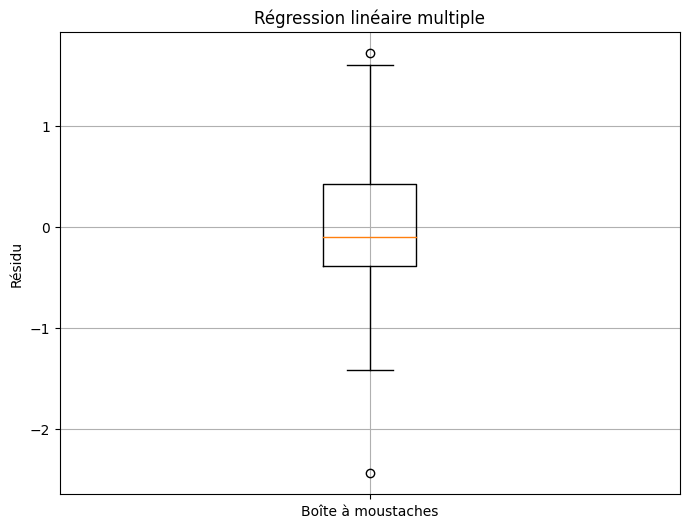

In [40]:
red_wine_numbers['residu'] = linreg_sel.resid

moy_res = red_wine_numbers.residu.mean()
print('Moyenne des résidus :', round(moy_res, ndigits=2))

var_res = red_wine_numbers.residu.var()
print('Variance des résidus :', round(var_res, ndigits=2))

plt.subplots(figsize=(8, 6))
plt.boxplot(red_wine_numbers['residu'], labels=['Boîte à moustaches'])
plt.grid()
plt.ylabel('Résidu')
plt.title('Régression linéaire multiple')
plt.show()

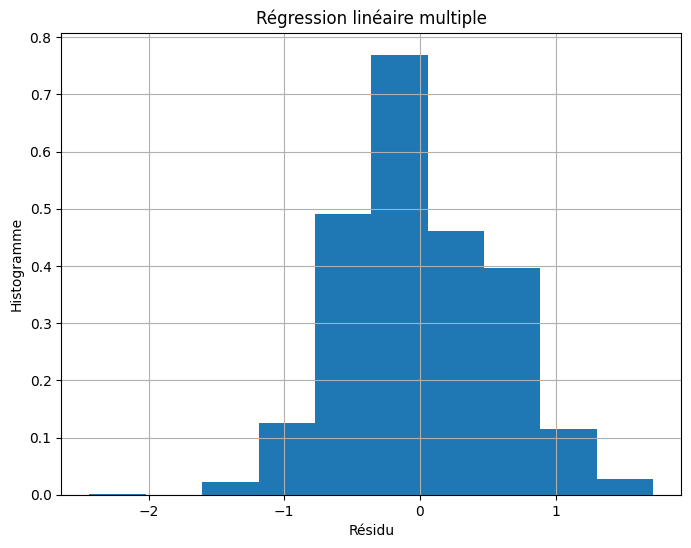

In [41]:
plt.subplots(figsize=(8, 6))
plt.hist(red_wine_numbers['residu'], density=True)
plt.grid()
plt.xlabel('Résidu')
plt.ylabel('Histogramme')
plt.title('Régression linéaire multiple')
plt.show()

In [42]:
# detectar colinearidade

#calcular VIF - Variance Inflation Factor
X = add_constant(X)

# Calcular o VIF para cada variável
vif_data = pd.DataFrame()
vif_data["variavel"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                   variavel           VIF
0                     const  1.710538e+06
1              Acidité fixe  7.767512e+00
2          Acidité volatile  1.789390e+00
3            Acide citrique  3.128022e+00
4            Sucre résiduel  1.702588e+00
5                 Chlorures  1.481932e+00
6   Dioxyde de soufre libre  1.963019e+00
7   Dioxyde de soufre total  2.186813e+00
8                   Densité  6.343760e+00
9                        pH  3.329732e+00
10                 Sulfates  1.429434e+00
11                   Alcool  3.031160e+00


In [43]:
# prevision du vin rouge

a_prevoir = pd.DataFrame({'const': [1], 'Acidité fixe':[6.9],'Acidité volatile': [0.3], 'Acide citrique': [0.3],
                          'Sucre résiduel': [6.4], 'Chlorures':[0.05],'Dioxyde de soufre libre':[35],'Dioxyde de soufre total':[138], 'Densité': [0.994],'pH':[3.1],'Sulfates':[0.5],'Alcool': [10.4]})
prev = linreg_sel.predict(a_prevoir)[0]
print('Prévision :', round(prev, ndigits=2))

Prévision : 1.65


vin blanc

In [44]:
# regressao liner multipla

var_y = 'Qualité'
y = white_wine_numbers[var_y]

var_x = ['Acidité fixe', 'Acidité volatile', 'Acide citrique', 'Sucre résiduel', 'Chlorures',
           'Dioxyde de soufre libre', 'Dioxyde de soufre total', 'Densité', 'pH', 'Sulfates','Alcool']
X = white_wine_numbers[var_x]


linreg_sel_model = OLS(y, add_constant(X))
linreg_sel = linreg_sel_model.fit()
linreg_sel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Qualité   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     185.8
Date:                Sat, 25 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:06:46   Log-Likelihood:                -4572.3
No. Observations:                4898   AIC:                             9169.
Df Residuals:                    4886   BIC:                             9247.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     107.0762     15.421      6.943      0.000      76.844     137.309
Acidité fixe                0.0626      0.017      3.656      0.000       0.029       0.096
Acidité volatile           -1.4559      0.093    -15.601      0.000      -1.639      -1.273
Acide citrique             -0.0461      0.079     -0.587      0.557      -0.200       0.108
Sucre résiduel              0.0600      0.006      9.728      0.000       0.048       0.072
Chlorures                  -0.3277      0.448     -0.731      0.465      -1.206       0.551
Dioxyde de soufre libre     0.0031      0.001      4.532      0.000       0.002       0.004
Dioxyde de soufre total    -0.0006      0.000     -1.888      0.059      -0.001    2.24e-05
Densité                  -110.2627     15.643     -7.049      0.000    -140.930     -79.596
pH                          0.5647      0.086      6.535      0.000       0.395       0.734
Sulfates                    0.5577      0.082      6.774      0.000       0.396       0.719
Alcool                      0.1834      0.020      9.235      0.000       0.144       0.222
==============================================================================
Omnibus:                      120.359   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.140
Skew:                           0.181   Prob(JB):                     1.08e-17
Kurtosis:                       2.498   Cond. No.                     3.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

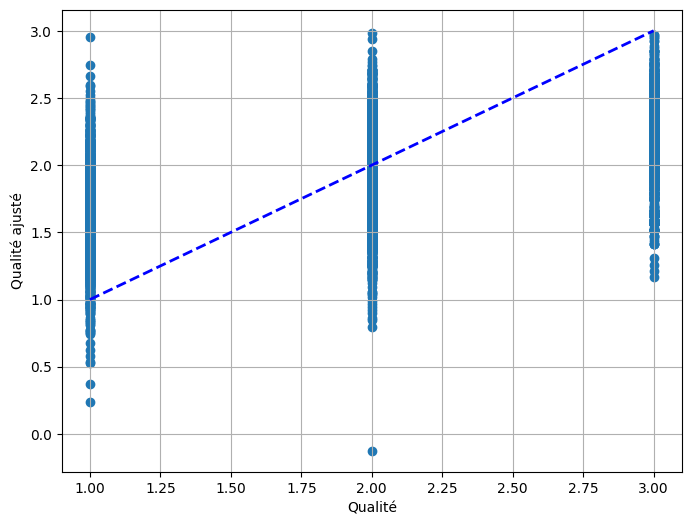

In [168]:
# analyse de l'ajustement
white_wine_numbers['quality_ajust'] = linreg_sel.fittedvalues

x_bissec = np.linspace(white_wine_numbers['quality'].min(), white_wine_numbers['quality'].max(), 2)

plt.subplots(figsize=(8, 6))
plt.scatter(white_wine_numbers['quality'], white_wine_numbers['quality_ajust'])
plt.plot(x_bissec, x_bissec, linestyle='dashed', lw=2, color='blue')
plt.grid()
plt.xlabel('Qualité')
plt.ylabel('Qualité ajusté')
plt.show()

Moyenne des résidus : 0.0
Variance des résidus : 0.38


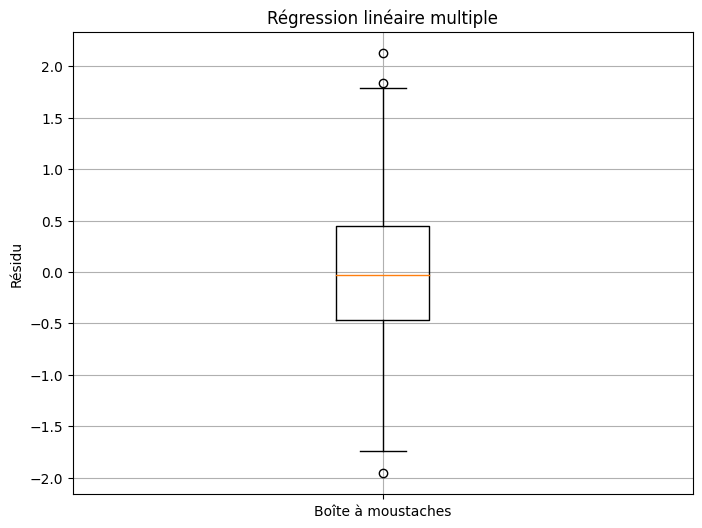

In [45]:
white_wine_numbers['residu'] = linreg_sel.resid

moy_res = white_wine_numbers.residu.mean()
print('Moyenne des résidus :', round(moy_res, ndigits=2))

var_res = white_wine_numbers.residu.var()
print('Variance des résidus :', round(var_res, ndigits=2))

plt.subplots(figsize=(8, 6))
plt.boxplot(white_wine_numbers['residu'], labels=['Boîte à moustaches'])
plt.grid()
plt.ylabel('Résidu')
plt.title('Régression linéaire multiple')
plt.show()

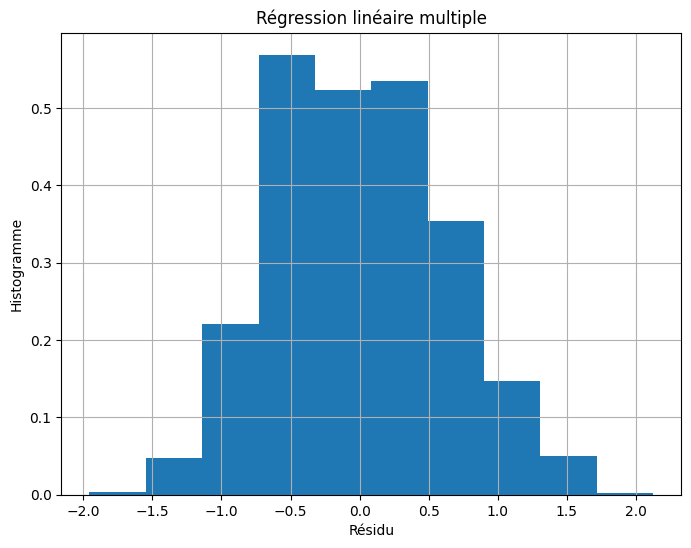

In [46]:
plt.subplots(figsize=(8, 6))
plt.hist(white_wine_numbers['residu'], density=True)
plt.grid()
plt.xlabel('Résidu')
plt.ylabel('Histogramme')
plt.title('Régression linéaire multiple')
plt.show()

In [47]:
# detectar colinearidade

#calcular VIF - Variance Inflation Factor
X = add_constant(X)

# Calcular o VIF para cada variável
vif_data = pd.DataFrame()
vif_data["variavel"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                   variavel           VIF
0                     const  3.067856e+06
1              Acidité fixe  2.691435e+00
2          Acidité volatile  1.141156e+00
3            Acide citrique  1.165215e+00
4            Sucre résiduel  1.264406e+01
5                 Chlorures  1.236822e+00
6   Dioxyde de soufre libre  1.787880e+00
7   Dioxyde de soufre total  2.239233e+00
8                   Densité  2.823255e+01
9                        pH  2.196362e+00
10                 Sulfates  1.138540e+00
11                   Alcool  7.706957e+00


In [48]:
# prevision de la qualité du vin blanc

a_prevoir = pd.DataFrame({'const': [1], 'Acidité fixe':[6.9],'Acidité volatile': [0.3], 'Acide citrique': [0.3],
                          'Sucre résiduel': [6.4], 'Chlorures':[0.05],'Dioxyde de soufre libre':[35],'Dioxyde de soufre total':[138], 'density': [0.994],'pH':[3.1],'sulphates':[0.5],'alcohol': [10.4]})
prev = linreg_sel.predict(a_prevoir)[0]
print('Prévision :', round(prev, ndigits=2))

Prévision : 1.79


tous les vins

In [49]:
# Dicionário para renomear as colunas
rename_columns = {
    'fixed acidity': 'Acidité fixe',
    'volatile acidity': 'Acidité volatile',
    'citric acid': 'Acide citrique',
    'residual sugar': 'Sucre résiduel',
    'chlorides': 'Chlorures',
    'free sulfur dioxide': 'Dioxyde de soufre libre',
    'total sulfur dioxide': 'Dioxyde de soufre total',
    'density': 'Densité',  # Nome permanece o mesmo
    'pH': 'pH',            # Nome permanece o mesmo
    'sulphates': 'Sulfates',
    'alcohol': 'Alcool'   # Nome permanece o mesmo
}

# Renomear as colunas do dataframe
all_wines_numbers= all_wines_numbers.rename(columns=rename_columns)

In [50]:
# regressao liner multipla

var_y = 'Qualité'
y = all_wines_numbers[var_y]


var_x = ['Acidité fixe', 'Acidité volatile', 'Acide citrique', 'Sucre résiduel', 'Chlorures',
           'Dioxyde de soufre libre', 'Dioxyde de soufre total', 'Densité', 'pH', 'Sulfates','Alcool']
X = all_wines_numbers[var_x]


linreg_sel_model = OLS(y, add_constant(X))
linreg_sel = linreg_sel_model.fit()
linreg_sel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Qualité   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     270.4
Date:                Sat, 25 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:10:10   Log-Likelihood:                -5957.3
No. Observations:                6497   AIC:                         1.194e+04
Df Residuals:                    6485   BIC:                         1.202e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      56.5942      9.800      5.775      0.000      37.383      75.805
Acidité fixe                0.0753      0.013      5.868      0.000       0.050       0.100
Acidité volatile           -1.0711      0.064    -16.802      0.000      -1.196      -0.946
Acide citrique             -0.1146      0.066     -1.747      0.081      -0.243       0.014
Sucre résiduel              0.0407      0.004      9.575      0.000       0.032       0.049
Chlorures                  -0.4728      0.274     -1.725      0.085      -1.010       0.064
Dioxyde de soufre libre     0.0046      0.001      7.427      0.000       0.003       0.006
Dioxyde de soufre total    -0.0021      0.000     -9.247      0.000      -0.003      -0.002
Densité                   -59.4510     10.001     -5.945      0.000     -79.055     -39.847
pH                          0.4485      0.074      6.023      0.000       0.302       0.594
Sulfates                    0.6759      0.063     10.776      0.000       0.553       0.799
Alcool                      0.2225      0.014     16.143      0.000       0.195       0.250
==============================================================================
Omnibus:                      123.515   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.442
Skew:                           0.186   Prob(JB):                     3.78e-20
Kurtosis:                       2.562   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

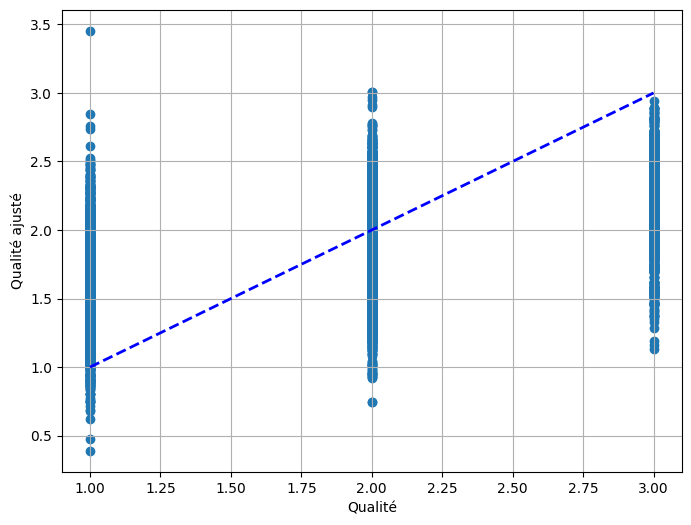

In [176]:
# analyse de l'ajustement
all_wines_numbers['quality_ajust'] = linreg_sel.fittedvalues

x_bissec = np.linspace(all_wines_numbers['quality'].min(), all_wines_numbers['quality'].max(), 2)

plt.subplots(figsize=(8, 6))
plt.scatter(all_wines_numbers['quality'], all_wines_numbers['quality_ajust'])
plt.plot(x_bissec, x_bissec, linestyle='dashed', lw=2, color='blue')
plt.grid()
plt.xlabel('Qualité')
plt.ylabel('Qualité ajusté')
plt.show()

Moyenne des résidus : 0.0
Variance des résidus : 0.37


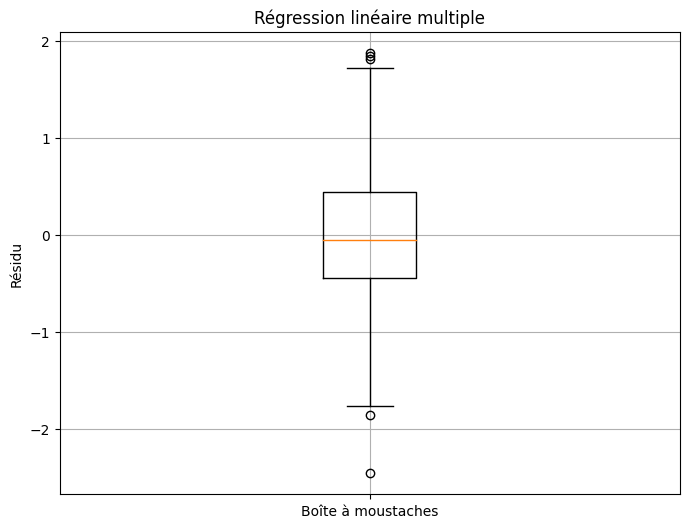

In [51]:
all_wines_numbers['residu'] = linreg_sel.resid

moy_res = all_wines_numbers.residu.mean()
print('Moyenne des résidus :', round(moy_res, ndigits=2))

var_res = all_wines_numbers.residu.var()
print('Variance des résidus :', round(var_res, ndigits=2))

plt.subplots(figsize=(8, 6))
plt.boxplot(all_wines_numbers['residu'], labels=['Boîte à moustaches'])
plt.grid()
plt.ylabel('Résidu')
plt.title('Régression linéaire multiple')
plt.show()

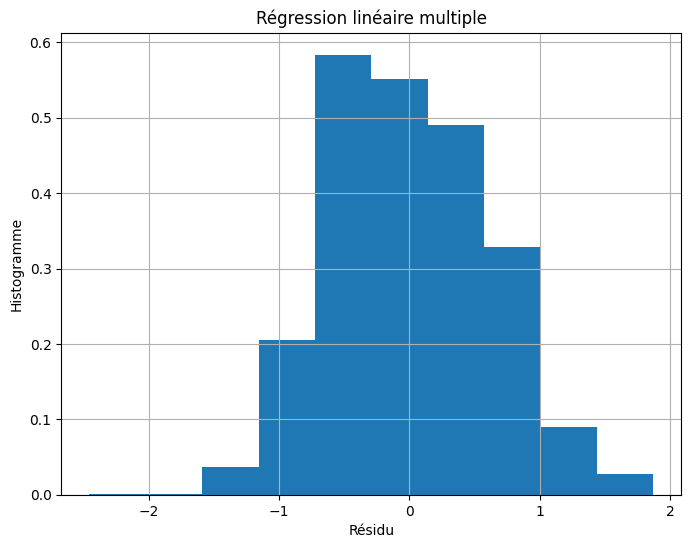

In [52]:
plt.subplots(figsize=(8, 6))
plt.hist(all_wines_numbers['residu'], density=True)
plt.grid()
plt.xlabel('Résidu')
plt.ylabel('Histogramme')
plt.title('Régression linéaire multiple')
plt.show()

In [53]:
# detectar colinearidade

#calcular VIF - Variance Inflation Factor
X = add_constant(X)

# Calcular o VIF para cada variável
vif_data = pd.DataFrame()
vif_data["variavel"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                   variavel           VIF
0                     const  1.699783e+06
1              Acidité fixe  4.896925e+00
2          Acidité volatile  1.949413e+00
3            Acide citrique  1.608220e+00
4            Sucre résiduel  7.228979e+00
5                 Chlorures  1.631958e+00
6   Dioxyde de soufre libre  2.135481e+00
7   Dioxyde de soufre total  2.937601e+00
8                   Densité  1.591450e+01
9                        pH  2.536522e+00
10                 Sulfates  1.541526e+00
11                   Alcool  4.782130e+00


In [55]:
# prevision de la qualité du vin

a_prevoir = pd.DataFrame({'const': [1], 'Acidité fixe':[6.9],'Acidité volatile': [0.3], 'Acide citrique': [0.3],
                          'Sucre résiduel': [6.4], 'Chlorures':[0.05],'Dioxyde de soufre libre':[35],'Dioxyde de soufre total':[138], 'Densité': [0.994],'pH':[3.1], 'Sulfates':[0.5],'Alcool': [10.4]})
prev = linreg_sel.predict(a_prevoir)[0]
print('Prévision :', round(prev, ndigits=2))

Prévision : 1.81


### Ajustement de la regression

vin rouge

In [56]:
# Essa célula serve pra obtermos os p-valores das variáveis,
# para podermos retirar os que são maiores que 5% na célula seguinte

columns = ['Acidité fixe', 'Acidité volatile', 'Acide citrique', 'Sucre résiduel', 'Chlorures',
           'Dioxyde de soufre libre', 'Dioxyde de soufre total', 'Densité', 'pH', 'Sulfates','Alcool', 'Qualité']



X = red_wine_numbers[columns[:-1]]  # As 11 primeiras colunas (características químicas)
y = red_wine_numbers[columns[-1]]   # A última coluna (nota de qualidade)

# Adicionar uma constante para o modelo (intercepto)
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear usando statsmodels
model = sm.OLS(y, X).fit()

# Obter os p-valores
p_values = model.pvalues

# Exibir os resultados
print("P-valores das variáveis:")
print(p_values)

P-valores das variáveis:
const                      1.723829e-02
Acidité fixe               9.811647e-03
Acidité volatile           9.780088e-13
Acide citrique             4.144693e-01
Sucre résiduel             1.013059e-02
Chlorures                  6.333466e-05
Dioxyde de soufre libre    3.508582e-02
Dioxyde de soufre total    1.103931e-09
Densité                    1.656509e-02
pH                         7.561327e-01
Sulfates                   2.247055e-18
Alcool                     1.851220e-23
dtype: float64


In [57]:
# retirar as variaveis q tem p-value maior que 5%
# retirar variaveis com alta correlação

var_x =  ['Acidité fixe', 'Acidité volatile', 'Acide citrique','Sucre résiduel', 'Chlorures',
           'Dioxyde de soufre libre', 'Dioxyde de soufre total', 'Densité', 'pH', 'Sulfates','Alcool']
X = red_wine_numbers[var_x]

# pd.options.display.float_format = '{:.6f}'.format

linreg_sel = sm.OLS(y, X).fit()

print(linreg_sel.summary())

                                 OLS Regression Results                                
Dep. Variable:                Qualité   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              1409.
Date:                Sat, 25 Jan 2025   Prob (F-statistic):                        0.00
Time:                        22:18:49   Log-Likelihood:                         -1319.5
No. Observations:                1599   AIC:                                      2661.
Df Residuals:                    1588   BIC:                                      2720.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

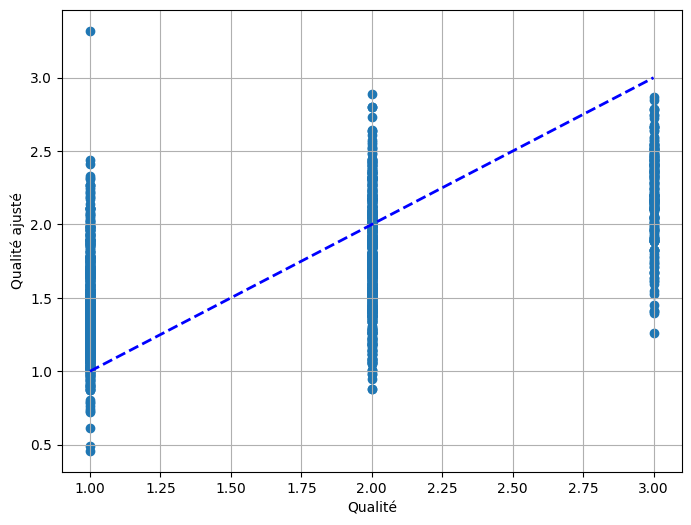

In [58]:
# analyse de l'ajustement
red_wine_numbers['quality_ajust'] = linreg_sel.fittedvalues

x_bissec = np.linspace(red_wine_numbers['Qualité'].min(), red_wine_numbers['Qualité'].max(), 2)

plt.subplots(figsize=(8, 6))
plt.scatter(red_wine_numbers['Qualité'], red_wine_numbers['quality_ajust'])
plt.plot(x_bissec, x_bissec, linestyle='dashed', lw=2, color='blue')
plt.grid()
plt.xlabel('Qualité')
plt.ylabel('Qualité ajusté')
plt.show()

Moyenne des résidus : 0.0
Variance des résidus : 0.31


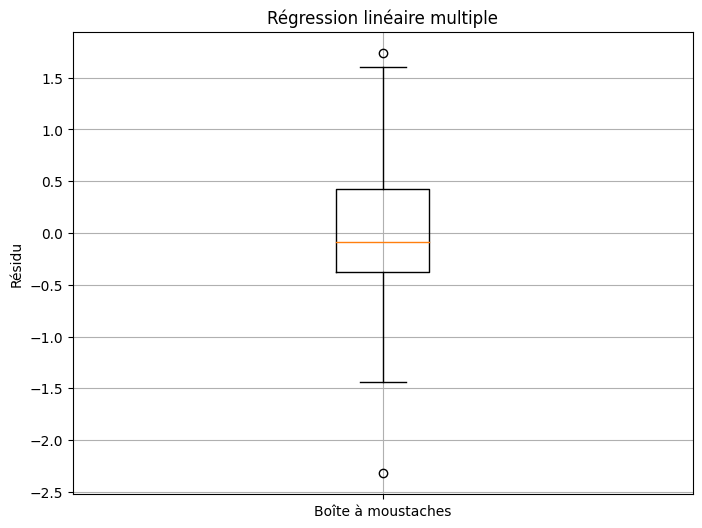

In [59]:
red_wine_numbers['residu'] = linreg_sel.resid

moy_res = red_wine_numbers.residu.mean()
print('Moyenne des résidus :', round(moy_res, ndigits=2))

var_res = red_wine_numbers.residu.var()
print('Variance des résidus :', round(var_res, ndigits=2))

plt.subplots(figsize=(8, 6))
plt.boxplot(red_wine_numbers['residu'], labels=['Boîte à moustaches'])
plt.grid()
plt.ylabel('Résidu')
plt.title('Régression linéaire multiple')
plt.show()

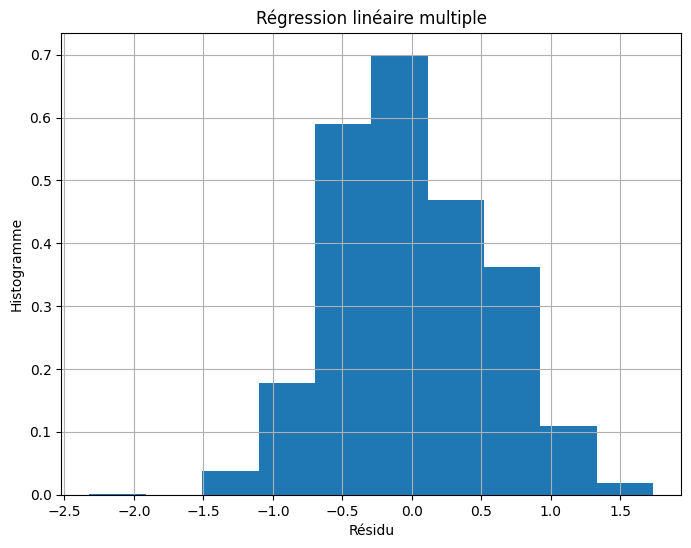

In [60]:
plt.subplots(figsize=(8, 6))
plt.hist(red_wine_numbers['residu'], density=True)
plt.grid()
plt.xlabel('Résidu')
plt.ylabel('Histogramme')
plt.title('Régression linéaire multiple')
plt.show()

In [63]:
# prevision du vin

# Justificar com o R2 : o R^2 é muito baixo

var_x = ['Acidité fixe', 'Acidité volatile', 'Chlorures', 'Sucre résiduel', 'Dioxyde de soufre libre', 'Dioxyde de soufre total', 'Densité', 'Sulfates', 'Alcool']

# Criar DataFrame de previsão com as mesmas variáveis usadas no modelo
a_prevoir = pd.DataFrame({'Acidité fixe': [6.9],
                          'Acidité volatile': [0.3],
                          'Acide citrique':[0.3],
                          'Sucre résiduel': [6.4],
                          'Chlorures': [0.05],
                          'Dioxyde de soufre libre': [35],
                          'Dioxyde de soufre total': [138],
                          'Densité': [0.994],
                          'pH':[3.1],
                          'Sulfates': [0.5],
                          'Alcool': [10.4]})

# Adicionar constante automaticamente
a_prevoir = sm.add_constant(a_prevoir)

# Fazer a previsão
prev = linreg_sel.predict(a_prevoir)[0]
print('Prévision :', round(prev, ndigits=2))

Prévision : 1.58


vin blanc

In [64]:
# Essa célula serve pra obtermos os p-valores das variáveis,
# para podermos retirar os que são maiores que 5% na célula seguinte

columns = ['Acidité fixe', 'Acidité volatile', 'Acide citrique', 'Sucre résiduel', 'Chlorures',
           'Dioxyde de soufre libre', 'Dioxyde de soufre total', 'Densité', 'pH', 'Sulfates','Alcool','Qualité']


X = white_wine_numbers[columns[:-1]]  # As 11 primeiras colunas (características químicas)
y = white_wine_numbers[columns[-1]]   # A última coluna (nota de qualidade)

# Adicionar uma constante para o modelo (intercepto)
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear usando statsmodels
model = sm.OLS(y, X).fit()

# Obter os p-valores
p_values = model.pvalues

# Exibir os resultados
print("P-valores das variáveis:")
print(p_values)

P-valores das variáveis:
const                      4.327756e-12
Acidité fixe               2.586806e-04
Acidité volatile           1.372719e-53
Acide citrique             5.574518e-01
Sucre résiduel             3.647661e-22
Chlorures                  4.647950e-01
Dioxyde de soufre libre    5.975940e-06
Dioxyde de soufre total    5.904894e-02
Densité                    2.057222e-12
pH                         7.024703e-11
Sulfates                   1.401996e-11
Alcool                     3.774184e-20
dtype: float64


In [65]:
# retirar as variaveis q tem p-value maior que 5%
# retirar variaveis com alta correlação

var_x =  ['Acidité fixe','Acidité volatile','Sucre résiduel',
           'Dioxyde de soufre libre', 'Densité', 'pH', 'Sulfates','Alcool']

X = white_wine_numbers[var_x]

# pd.options.display.float_format = '{:.6f}'.format

linreg_sel = sm.OLS(y, X).fit()

print(linreg_sel.summary())

                                 OLS Regression Results                                
Dep. Variable:                Qualité   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              5882.
Date:                Sat, 25 Jan 2025   Prob (F-statistic):                        0.00
Time:                        22:20:09   Log-Likelihood:                         -4604.9
No. Observations:                4898   AIC:                                      9226.
Df Residuals:                    4890   BIC:                                      9278.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

### Impementation de l'arbre de décisions

In [68]:
# Function to split the dataset into features and target variables
def split_dataset(data):
    # Criar uma cópia para evitar problemas de view vs. copy
    data = data.copy()

    # Verificar e tratar valores categóricos
    for col in data.columns:
        if data[col].dtype == 'object':  # Se a coluna for categórica
            print(f"Converting categorical column: {col}")
            data[col] = data[col].astype('category').cat.codes  # Codificar categorias como números

    # Definir a variável alvo (Y) como a coluna 'quality'
    X = data.drop(columns=['Qualité']).values  # Todas as colunas, exceto 'quality'
    Y = data['Qualité'].values  # Apenas a coluna 'quality'

    # Dividir o conjunto de dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=100)

    return X, Y, X_train, X_test, y_train, y_test

In [72]:
# Function to train using Gini Index
# Function to train using Entropy

def train_using_gini(X_train, y_train):
    clf_gini = DecisionTreeClassifier(
        criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
    clf_gini.fit(X_train, y_train)
    return clf_gini

def train_using_entropy(X_train, y_train):
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

# Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
    print("Report:\n", classification_report(y_test, y_pred))


# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

Converting categorical column: Qualité
Converting categorical column: type wine


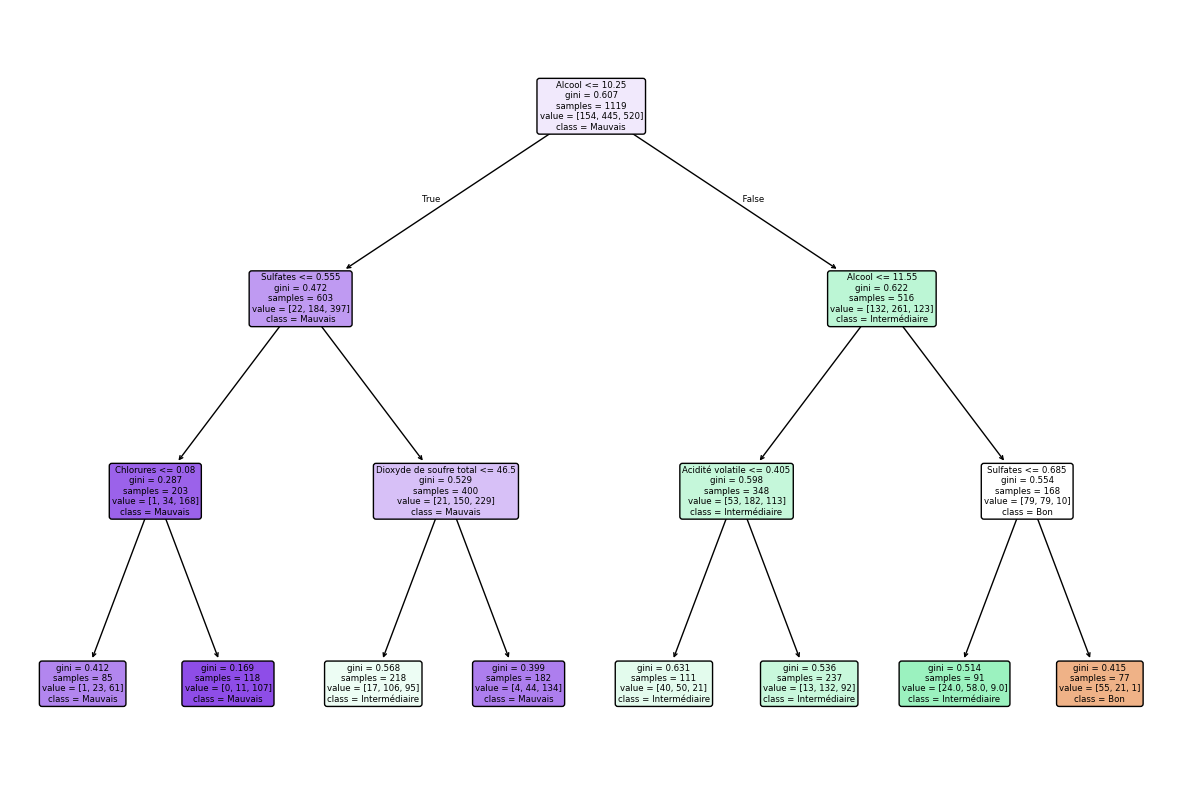

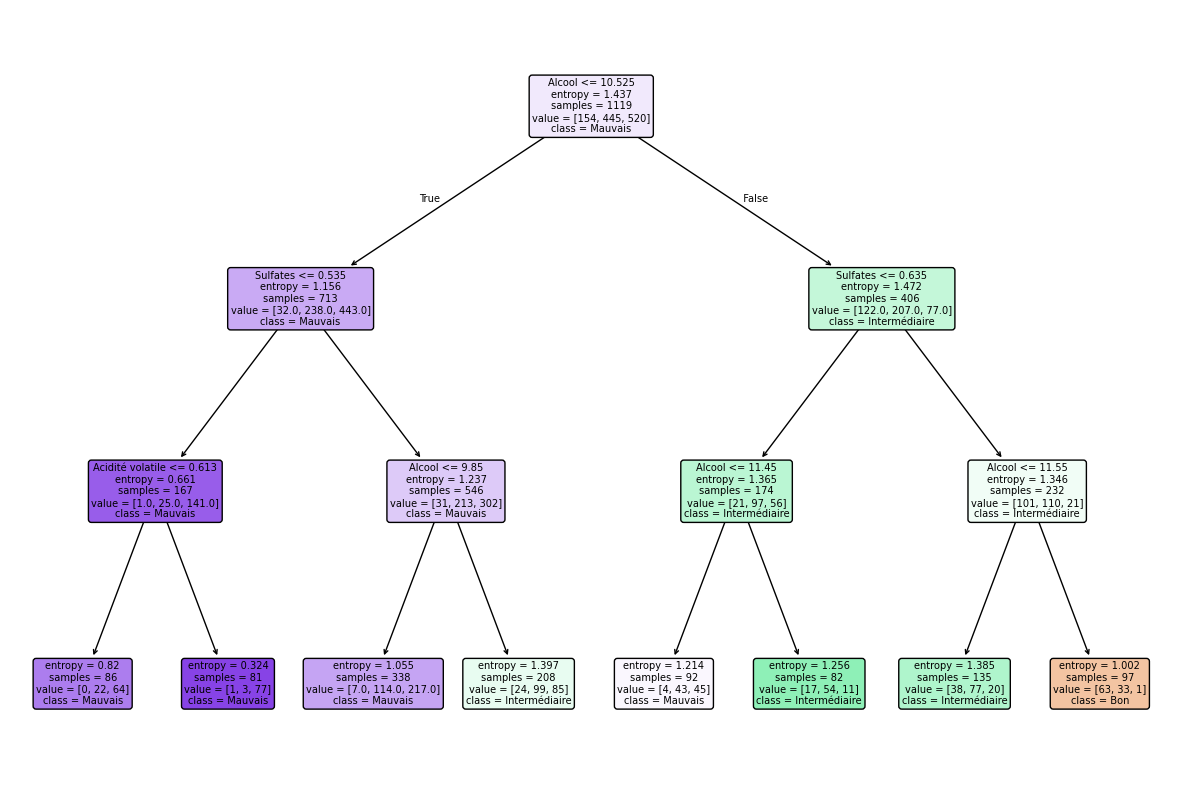

Results Using Gini Index:
Predicted values:
[1 1 1 2 1 0 2 1 1 1 0 2 1 2 1 2 1 2 1 2 1 2 1 0 1 1 1 1 1 1 2 2 1 1 2 1 1
 2 1 2 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 0 1 1 0 2 2 2 2 2 1 2 0 1 1
 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 0 2 2 1 2 1 1 1 1 2 2 1 1 1 1 1 1
 2 1 2 1 0 1 2 1 1 1 1 1 0 0 1 1 1 1 2 1 1 2 1 0 2 0 1 2 2 1 2 0 1 1 2 2 2
 0 2 2 1 1 1 1 2 1 1 1 1 1 1 1 2 0 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 2 1 1 1
 2 1 1 0 2 1 1 1 1 1 2 1 1 1 2 1 2 1 2 2 1 1 1 1 1 2 1 1 2 2 2 1 1 1 1 2 1
 2 2 0 2 2 0 1 1 2 2 2 0 0 2 1 2 1 2 2 2 1 1 2 1 1 1 2 1 1 1 0 1 1 1 1 1 2
 2 2 2 1 1 2 1 2 1 1 1 2 1 0 1 1 2 1 1 2 1 2 1 1 1 2 2 1 1 1 2 1 2 1 1 1 2
 1 1 1 1 2 2 1 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 2 1 2 2 2 1 1 2 1 1 2 1 1 0
 1 2 1 1 1 2 1 2 1 1 1 1 1 2 2 1 2 1 2 0 1 2 0 1 2 2 1 2 1 0 2 2 1 1 1 1 2
 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 0 1 1 2 1 1 2 2 2 1 0 2 1 1 0 2 1
 2 2 2 0 1 1 0 2 2 0 2 1 2 2 1 1 1 1 2 0 2 2 1 1 1 0 2 2 1 2 2 1 1 2 1 2 2
 2 2 2 1 1 0 1 1 1 2 2 1 1 2 1 2 2 2 0 1 1 2 2 2 1 1 0 1

In [73]:
if __name__ == "__main__":
    # Load datasets
 #   white_wine_data, red_wine_data = import_data()

    # Choose which dataset to work with (white or red wine)
    # Uncomment the line for the dataset you want to use
    # data = white_wine_data
    data = red_wine

    # Split the dataset
    X, Y, X_train, X_test, y_train, y_test = split_dataset(data)

    # Train classifiers
    clf_gini = train_using_gini(X_train, y_train)
    clf_entropy = train_using_entropy(X_train, y_train)

    # Visualizing the Decision Trees
    feature_names = data.columns[:-1]
    class_names = [str(cls) for cls in sorted(data['Qualité'].unique())]

    plot_decision_tree(clf_gini, feature_names, class_names)
    plot_decision_tree(clf_entropy, feature_names, class_names)

    # Test classifiers and evaluate
    print("Results Using Gini Index:")
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)

    print("Results Using Entropy:")
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)

Implementation de l'algorithme k-nearest neighbors

Converting categorical column: Qualité
Converting categorical column: type wine


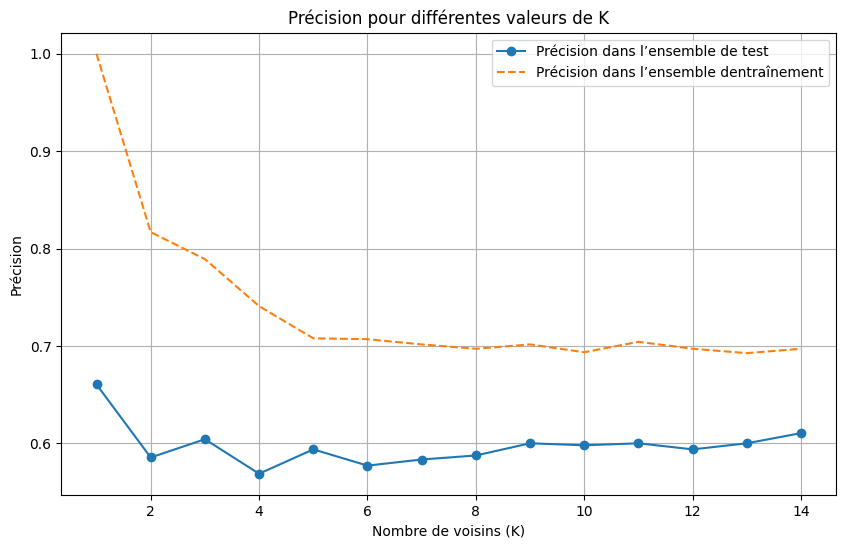

Meilleure valeur de K: 1
Précision finale dans l’ensemble de test avec K=1: 0.6604166666666667


In [76]:
# Função split_dataset já foi implementada e utilizada anteriormente:
X, Y, X_train, X_test, y_train, y_test = split_dataset(data)

# Inicializar uma lista para armazenar as precisões do modelo
neighbors = np.arange(1, 15)  # Testaremos valores de K de 1 a 14
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Loop para testar diferentes valores de K
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)  # Criar o modelo com k vizinhos
    knn.fit(X_train, y_train)  # Treinar o modelo com os dados de treino

    # Avaliar o modelo com os dados de treino e teste
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Gerar o gráfico de precisão para diferentes valores de K
plt.figure(figsize=(10, 6))
plt.plot(neighbors, test_accuracy, label='Précision dans l’ensemble de test', marker='o')
plt.plot(neighbors, train_accuracy, label='Précision dans l’ensemble dentraînement', linestyle='--')
plt.title('Précision pour différentes valeurs de K')
plt.xlabel('Nombre de voisins (K)')
plt.ylabel('Précision')
plt.legend()
plt.grid()
plt.show()

# Escolha o melhor valor de K com base na análise acima
best_k = neighbors[np.argmax(test_accuracy)]
print(f"Meilleure valeur de K: {best_k}")

# Treinar o modelo com o melhor K encontrado
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Avaliar o modelo no conjunto de teste
final_accuracy = knn.score(X_test, y_test)
print(f"Précision finale dans l’ensemble de test avec K={best_k}: {final_accuracy}")

Implementation de l'algorithme de random forest

In [77]:
# Function to split the dataset into features and target variables
def split_dataset(data):
    # Criar uma cópia para evitar problemas de view vs. copy
    data = data.copy()

    # Verificar e tratar valores categóricos
    for col in data.columns:
        if data[col].dtype == 'object':  # Se a coluna for categórica
            print(f"Converting categorical column: {col}")
            data[col] = data[col].astype('category').cat.codes  # Codificar categorias como números

    # Definir a variável alvo (Y) como a coluna 'quality'
    X = data.drop(columns=['Qualité']).values  # Todas as colunas, exceto 'quality'
    Y = data['Qualité'].values  # Apenas a coluna 'quality'

    # Dividir o conjunto de dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=100)

    return X, Y, X_train, X_test, y_train, y_test

Converting categorical column: Qualité
Converting categorical column: type wine
Out-of-Bag Score (OOB): 0.4776237315034353
Mean Squared Error (MSE): 0.24598270833333333
R-squared: 0.49324997541108206


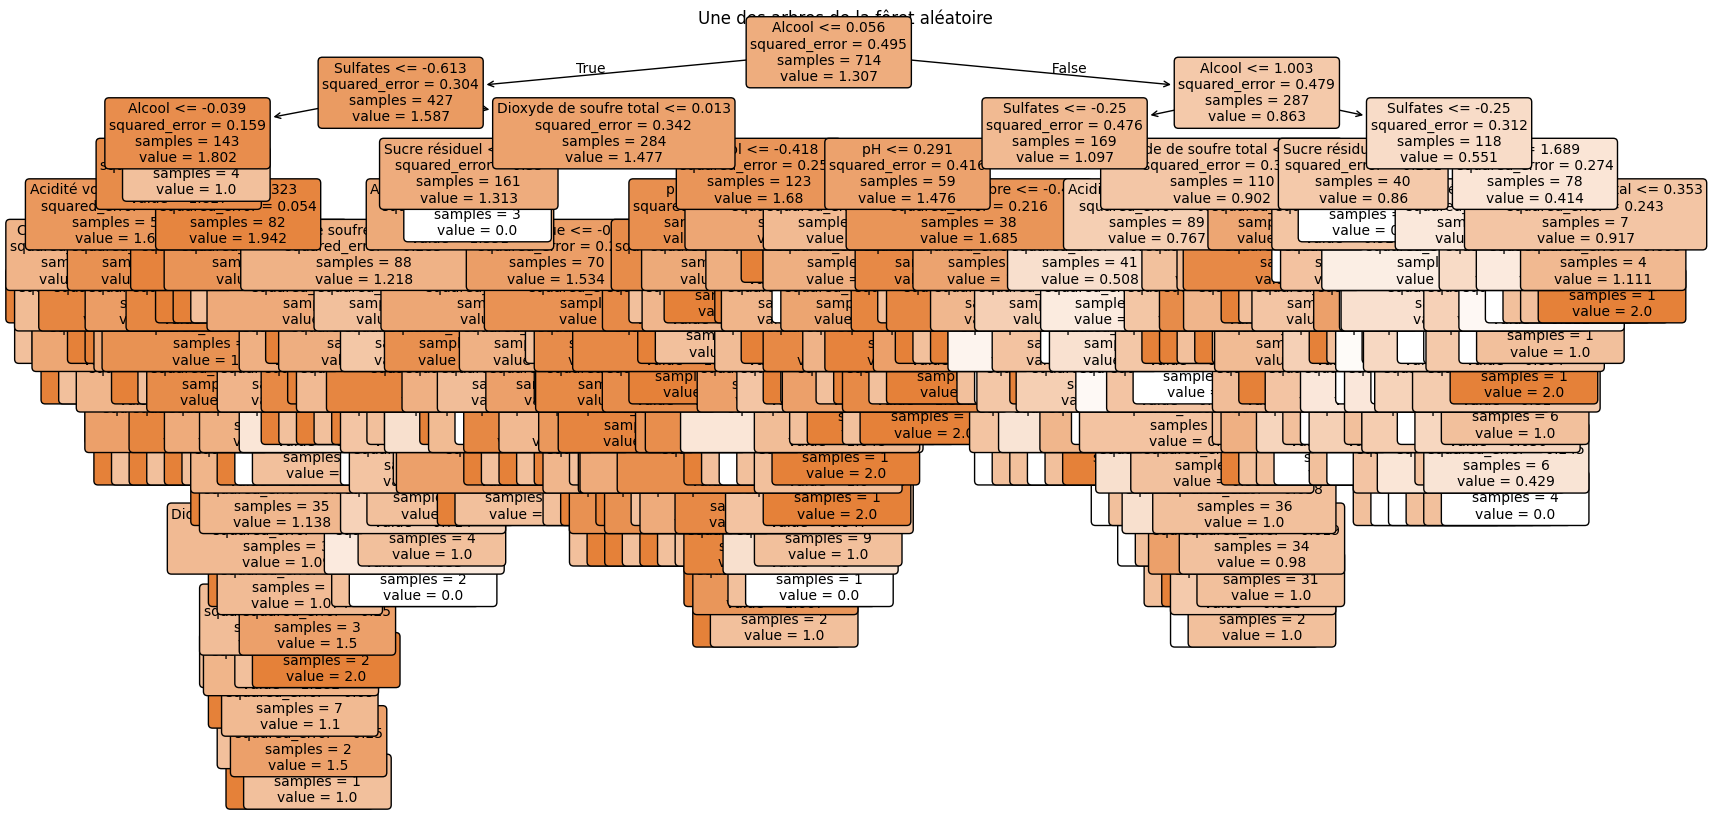

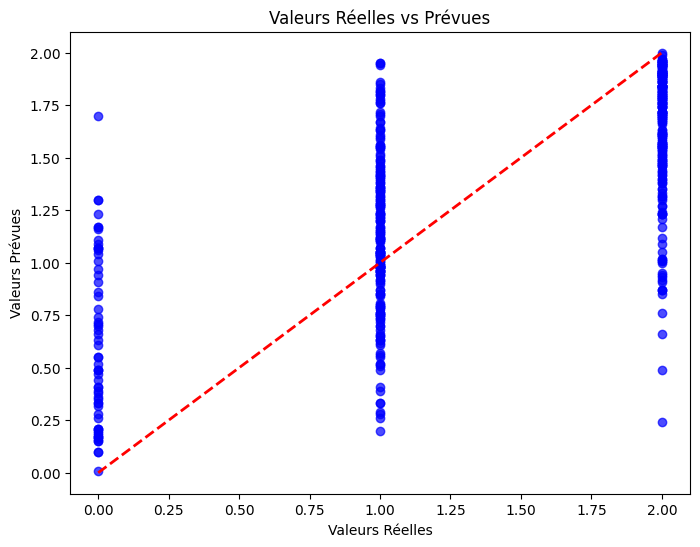

In [82]:
# Dividir o dataset
X, y, X_train, X_test, y_train, y_test = split_dataset(data)

# Escalonar as variáveis
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e ajustar o modelo Random Forest
regressor = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)  # OOB score ativado
regressor.fit(X_train, y_train)

# Acessar o OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score (OOB): {oob_score}')

# Fazer previsões no conjunto de teste
predictions = regressor.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')

# Visualizar uma das árvores na floresta
tree_to_plot = regressor.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=data.drop('Qualité', axis=1).columns, filled=True, rounded=True, fontsize=10)
plt.title("Une des arbres de la fôret aléatoire")
plt.show()

# Visualizar os valores reais vs previstos
plt.figure(figsize= (8, 6))
plt.scatter(y_test, predictions, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prévues")
plt.title("Valeurs Réelles vs Prévues")
plt.show()